In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Sommaire</h1>
<div id="toc"></div>

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold,StratifiedKFold
from catboost import CatBoostClassifier, Pool

#import cufflinks as cf
#cf.go_offline()
import pickle
import gc
import lightgbm as lgb
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.options.display.max_seq_items = 2000

In [7]:
pd.options.display.float_format = '{:,.4f}'.format

In [8]:
with open('data/colcat.pickle', 'rb') as f:
    colcat = pickle.load(f)
with open('data/colnum.pickle', 'rb') as f:
    colnum = pickle.load(f)    
with open('data/coldata.pickle', 'rb') as f:    
    coldata = pickle.load(f)
with open('data/colbase.pickle', 'rb') as f:    
    colbase = pickle.load(f)    

In [9]:
data = pd.read_csv('D:/openclassrooms/PROJET 7/data_imp_cr.csv')
print('Data shape: ', data.shape)
data.head()

Data shape:  (278219, 92)


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  AMT_ANNUITY  \
0       -0.5699            0.3168     -0.5460          -0.5609      -0.2501   
1       -0.5699            0.9486      1.6416           1.5226       0.5262   
2       -0.5699           -0.3150     -0.7777          -0.7054       0.1018   
3       -0.5699           -0.4413     -0.2836          -0.1273      -0.4502   
4       -0.5699           -0.6519     -0.3391          -0.2839      -0.0513   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0          -1.2685               -0.1105                      -0.0705   
1          -0.1648               -2.0828                      -2.0663   
2          -0.1648               -0.1105                      -0.0705   
3          -1.2685               -0.1105                      -0.0705   
4          -0.1648               -0.1105                      -0.0705   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0       -3.0469       -1.3081       -2.1555                    0.2412   
1       -1.4015        0.5676        0.1188                   -0.1871   
2        0.0140        0.7148        0.1188                    0.2412   
3        0.0140       -0.9959        0.1188                   -0.6154   
4        0.0140       -0.8316        0.6000                   -0.6154   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                    4.1700                    0.2506   
1                   -0.3251                   -0.1814   
2                   -0.3251                    0.2506   
3                   -0.3251                   -0.6134   
4                   -0.3251                   -0.6134   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_SUM  \
0                    5.2499                 -0.1854         -2.1768   
1                   -0.2787                  0.1816          0.0543   
2                   -0.2787                  0.4347          0.6499   
3                   -0.2787                 -0.1518         -0.8945   
4                   -0.2787                 -1.8668         -0.7461   

   EXT_SOURCE_MEAN  LENGTH_CREDIT  INCOME_PER_PERSON  REMAIN_FOR_LIFE  \
0          -2.1768        -0.6486             1.5314           0.3673   
1           0.0543         1.7611             0.5873           0.9222   
2           0.6499        -1.3711            -0.3569          -0.3446   
3          -0.8945         0.2045             0.3984          -0.4004   
4          -0.7461        -0.4824            -0.6087          -0.6769   

   REMAIN_FOR_LIFE_PER_PERSON  CREDIT_INCOME_RATIO  ANNUITY_INCOME_RATIO  \
0                      1.5239              -0.7811               -0.7036   
1                      0.6008               0.2347               -0.5956   
2                     -0.3808              -0.6686                0.3300   
3                      0.3342               0.0271               -0.0916   
4                     -0.6383               0.2944                0.9428   

   YEARS_EMPLOYED  YEARS_BIRTH  EMPLOYED_RATIO  DEF_OBS_30  DEF_OBS_60  \
0         -0.5712      -1.5421         -0.4510      4.3062      4.3062   
1         -0.3337       0.1394         -0.4250     -0.3103     -0.3103   
2          0.4644       0.6551          0.2304     -0.3103     -0.3103   
3          0.4639       0.8685          0.1753     -0.3103     -0.3103   
4         -0.1612       0.1800         -0.2567     -0.3103     -0.3103   

   RATE_DOC  BUR_TOT_CREDIT  BUR_TOT_CREDIT_DEBT  BUR_TOT_CREDIT_OVERDUE  \
0   -0.0836         -0.2126              -0.2005                 -0.0127   
1   -0.0836         -0.1727              -0.3628                 -0.0127   
2   -0.0836         -0.4391              -0.3628                 -0.0127   
3   -0.0836         -0.4008              -0.3628                 -0.0127   
4   -0.0836         -0.3165              -0.2043                 -0.0127   

   BUR_TOT_CREDIT_PROLONG  BUR_TOT_ANNUITY  BUR_MIN_DAYS_CREDIT  \
0              

In [10]:
data.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_SUM', 'EXT_SOURCE_MEAN',
       'LENGTH_CREDIT', 'INCOME_PER_PERSON', 'REMAIN_FOR_LIFE',
       'REMAIN_FOR_LIFE_PER_PERSON', 'CREDIT_INCOME_RATIO',
       'ANNUITY_INCOME_RATIO', 'YEARS_EMPLOYED', 'YEARS_BIRTH',
       'EMPLOYED_RATIO', 'DEF_OBS_30', 'DEF_OBS_60', 'RATE_DOC',
       'BUR_TOT_CREDIT', 'BUR_TOT_CREDIT_DEBT', 'BUR_TOT_CREDIT_OVERDUE',
       'BUR_TOT_CREDIT_PROLONG', 'BUR_TOT_ANNUITY', 'BUR_MIN_DAYS_CREDIT',
       'BUR_MAX_DAYS_OVERDUE', 'BUR_CNT_ACTIVE_LOAN', 'BUR_CNT_CLOSED_LOAN',
       'BUR_TOT_ANNUITY_ACTIVE', 'BUR_TOT_CREDIT_ACTIVE', 'BUR_CNT_REQUEST_1Y',
       'BUR_BAL_DP

In [11]:
data.TARGET

0         1
1         0
2         0
3         0
4         0
         ..
278214    0
278215    0
278216    0
278217    1
278218    0
Name: TARGET, Length: 278219, dtype: int64

Préparation du jeu de données

In [12]:
y = data['TARGET']
X_train, X_temp, y_train, y_temp = train_test_split(data.drop(['TARGET'],axis=1), y, stratify = y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (194753, 91)
Shape of X_val: (41733, 91)
Shape of X_test: (41733, 91)


In [13]:
X_train

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
55759        -0.5699            0.6538      0.2918           0.3063   
9285         -0.5699            0.5274      4.6603           4.5214   
88439         2.2097           -0.8625      0.1160           0.3063   
268700       -0.5699           -0.0201     -0.9207          -0.8981   
159885       -0.5699            0.5274     -0.8035          -0.8860   
...              ...               ...         ...              ...   
11108        -0.5699           -0.1044     -0.2046          -0.2959   
237325       -0.5699            2.6334      2.1502           2.1128   
27791        -0.5699           -1.0731     -1.0299          -1.0546   
5306          0.8199           -0.3150     -0.8755          -0.9222   
144389       -0.5699           -0.5256     -0.8621          -0.8981   

        AMT_ANNUITY  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
55759        1.8488          -0.1648                1.8617   
9285         2.7026          -0.1648               -0.1105   
88439       -0.4474           2.0426                1.8617   
268700      -0.3210          -0.1648               -0.1105   
159885      -0.8273          -0.1648               -0.1105   
...             ...              ...                   ...   
11108       -0.7558          -0.1648               -0.1105   
237325       3.4967          -1.2685               -0.1105   
27791       -1.4244          -0.1648               -0.1105   
5306        -1.2580          -0.1648                1.8617   
144389      -0.1818          -0.1648               -0.1105   

        REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
55759                        1.9253        0.6848       -0.0542       -1.9778   
9285                        -0.0705        0.0140        0.8927        0.8736   
88439                        1.9253       -0.8300        0.4997        0.5513   
268700                      -0.0705        0.0140        0.0452       -0.4766   
159885                      -0.0705        0.2565       -1.7006       -0.5873   
...                             ...           ...           ...           ...   
11108                       -0.0705        0.0140        0.6400       -2.2799   
237325                      -0.0705        2.6325        0.3999        1.5088   
27791                       -0.0705        0.0140        0.4143        1.1703   
5306                         1.9253        0.0140       -1.4457        1.5369   
144389                      -0.0705       -2.8902       -0.3382        0.1188   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
55759                     1.0979                   -0.3251   
9285                      0.6696                    4.1700   
88439                    -0.6154                   -0.3251   
268700                    0.2412                   -0.3251   
159885                   -0.6154                   -0.3251   
...                          ...                       ...   
11108                     2.3829                    8.6652   
237325                    1.5262                   -0.3251   
27791                    -0.6154                   -0.3251   
5306                     -0.6154                   -0.3251   
144389                   -0.6154                   -0.3251   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
55759                     0.6826                   -0.2787   
9285                      0.6826                    2.4856   
88439                    -0.6134                   -0.2787   
268700                    0.2506                   -0.2787   
159885                   -0.6134                   -0.2787   
...                          ...                       ...   
11108                     2.4107                   10.7785   
237325                    1.5466                   -0.2787   
27791                    -0.6134                   -0.2787   
5306                     -0.6134                   -0.2787   
144389    

In [14]:
y_val.value_counts()

0    38250
1     3483
Name: TARGET, dtype: int64

In [15]:
y_train.value_counts()

0    178499
1     16254
Name: TARGET, dtype: int64

In [16]:
X_train.to_csv('D:/openclassrooms/PROJET 7/X_train_impute.csv')
X_val.to_csv('D:/openclassrooms/PROJET 7/X_val_impute.csv')
X_test.to_csv('D:/openclassrooms/PROJET 7/X_test_impute.csv')
y_train.to_csv('D:/openclassrooms/PROJET 7/y_train_impute.csv')
y_val.to_csv('D:/openclassrooms/PROJET 7/y_val_impute.csv')
y_test.to_csv('D:/openclassrooms/PROJET 7/y_test_impute.csv')

# Selection de variables avec un modele simple

In [17]:
model_sk = lgb.LGBMClassifier(boosting_type='gbdt', max_depth=7, learning_rate=0.01, n_estimators= 2000, 
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8, n_jobs=-1)

train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train, test_size = 0.15, random_state = 42)

model_sk.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], eval_metric = 'auc', verbose = 200)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.750516	valid_0's binary_logloss: 0.593153
[400]	valid_0's auc: 0.764543	valid_0's binary_logloss: 0.569618
[600]	valid_0's auc: 0.770156	valid_0's binary_logloss: 0.557237
[800]	valid_0's auc: 0.772768	valid_0's binary_logloss: 0.549171
[1000]	valid_0's auc: 0.774325	valid_0's binary_logloss: 0.54293
[1200]	valid_0's auc: 0.77515	valid_0's binary_logloss: 0.537527
[1400]	valid_0's auc: 0.775504	valid_0's binary_logloss: 0.53274
[1600]	valid_0's auc: 0.77577	valid_0's binary_logloss: 0.528169
Early stopping, best iteration is:
[1635]	valid_0's auc: 0.775831	valid_0's binary_logloss: 0.527399


LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.01, max_depth=7, n_estimators=2000,
               subsample=0.9)

In [18]:
model_sk.feature_importances_

array([ 103,  352, 1311, 1331, 1126,  160,   97,  355, 2073, 1356, 2435,
        259,   26,  181,  269, 1560, 1764,  408, 3789,  581,  568,  482,
       1069, 1139, 1097, 2551, 1156,  183,   36,  450, 1357, 1247,  242,
         29,  333, 1181,   90,  571,  734,  229, 1066,  535,    9,   33,
        242, 1259,  205,  707,   65,  267,   65,  158,  727, 1423,    0,
        111,  469,  735,  110,   27,  510,   30,   30,    4, 1391,  889,
        541,  635,  279,   26,   71,  210,   59,  341,   41,   21,   99,
        182,    0,   26,  261,   22,   41,   22,   13,   36,   59,   72,
         22,   21,  586])

In [19]:
feature_imp = pd.DataFrame(sorted(zip(model_sk.feature_importances_, X_train.columns)), columns=['Value','Feature'])
features_df = feature_imp.sort_values(by="Value", ascending=False)
selected_features = list(features_df[features_df['Value']>=50]['Feature'])
# Saving the selected features into pickle file
with open('select_features.txt','wb') as fp:
    pickle.dump(selected_features, fp)
print('The no. of features selected:',len(selected_features))

The no. of features selected: 69


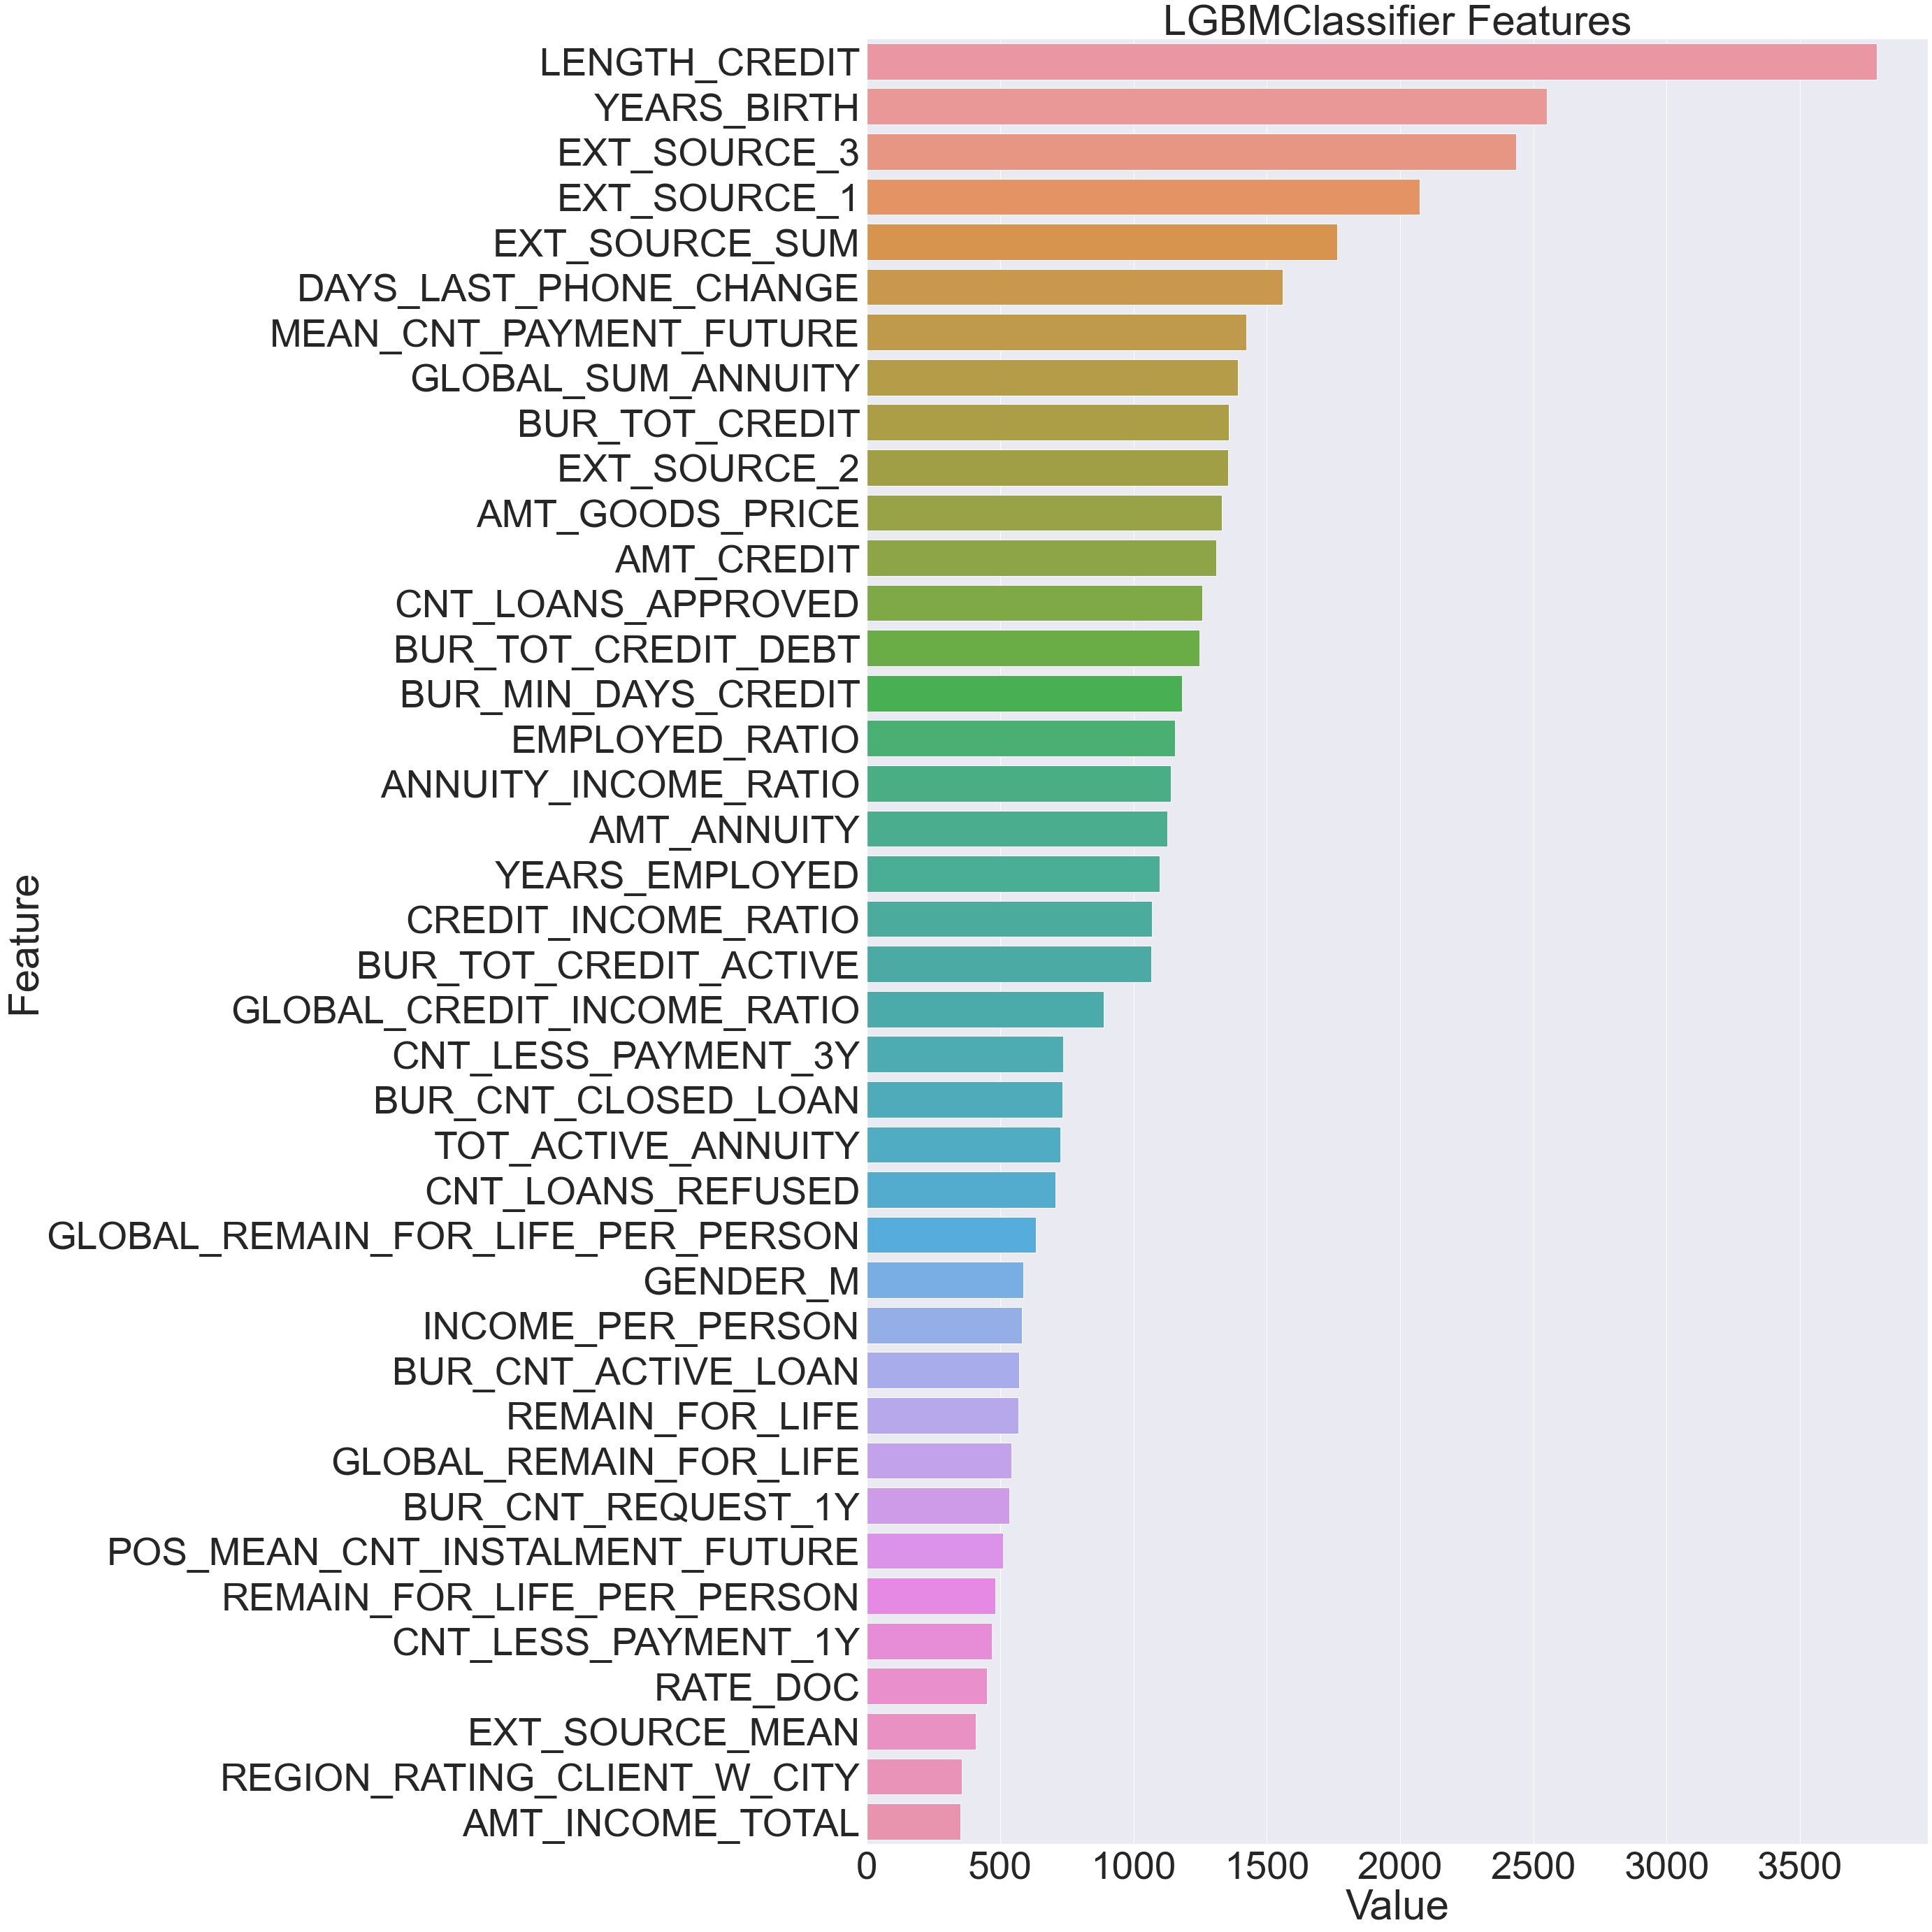

In [20]:
plt.figure(figsize=(40, 40))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:40])
plt.title('LGBMClassifier Features')
plt.tight_layout()
#plt.savefig('lgbm_importances-01.png')
plt.show()

# Fonction d'affichage

In [21]:
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)
    
    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    
    # Precision matrix
    B = (C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = ['Re-paid(0)','Not Re-paid(1)']
    cmap=sns.light_palette("purple")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Confusion matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Recall matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Precision matrix')
    
    plt.show()
    
def cv_plot(alpha, cv_auc):
    
    fig, ax = plt.subplots()
    ax.plot(np.log10(alpha), cv_auc,c='g')
    for i, txt in enumerate(np.round(cv_auc,3)):
        ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_auc[i]))
    plt.grid()
    plt.xticks(np.log10(alpha))
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()

# Regression logistique avec SGDClassifier

## Recherche paramètre alpha

In [22]:
sns.set(font_scale = 1)

For alpha 0.0001, cross validation AUC score 0.7515270173147257
For alpha 0.001, cross validation AUC score 0.7522572194731083
For alpha 0.01, cross validation AUC score 0.740091837289993
For alpha 0.1, cross validation AUC score 0.7187070232820855
For alpha 1.0, cross validation AUC score 0.5
For alpha 10.0, cross validation AUC score 0.5
For alpha 100.0, cross validation AUC score 0.5
For alpha 1000.0, cross validation AUC score 0.5
For alpha 10000.0, cross validation AUC score 0.5


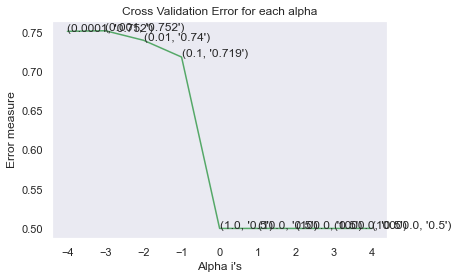

The Optimal alpha value is: 0.001


In [23]:
alpha = np.logspace(-4,4,9)
cv_auc_score = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1',class_weight = 'balanced', loss='log', random_state=28)
    clf.fit(X_train[selected_features], y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train[selected_features], y_train)
    y_pred_prob = sig_clf.predict_proba(X_val[selected_features])[:,1]
    cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
    print('For alpha {0}, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
cv_plot(alpha, cv_auc_score)
print('The Optimal alpha value is:', alpha[np.argmax(cv_auc_score)])

## Modèle avec CalibratedClassifierCV

For best alpha 0.001, The Train AUC score is 0.7553490159002118
For best alpha 0.001, The Cross validated AUC score is 0.7522572194731083
For best alpha 0.001, The Test AUC score is 0.747857586522024
The test AUC score is : 0.747857586522024
The percentage of misclassified points 30.78% :


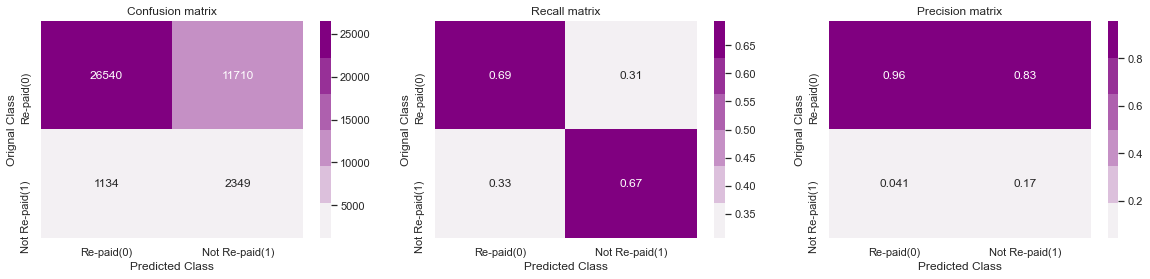

In [24]:
best_alpha = alpha[np.argmax(cv_auc_score)]

logreg = SGDClassifier(alpha = best_alpha, class_weight = 'balanced', penalty = 'l1', loss='log', random_state = 28)
logreg.fit(X_train[selected_features], y_train)

logreg_sig_clf = CalibratedClassifierCV(logreg, method='sigmoid')
logreg_sig_clf.fit(X_train[selected_features], y_train)

y_pred_prob = logreg_sig_clf.predict_proba(X_train[selected_features])[:,1]
print('For best alpha {0}, The Train AUC score is {1}'.format(best_alpha, roc_auc_score(y_train,y_pred_prob) ))  

y_pred_prob = logreg_sig_clf.predict_proba(X_val[selected_features])[:,1]
print('For best alpha {0}, The Cross validated AUC score is {1}'.format(best_alpha, roc_auc_score(y_val,y_pred_prob) ))  

y_pred_prob = logreg_sig_clf.predict_proba(X_test[selected_features])[:,1]
print('For best alpha {0}, The Test AUC score is {1}'.format(best_alpha, roc_auc_score(y_test,y_pred_prob) ))

y_pred = logreg.predict(X_test[selected_features])
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))

plot_confusion_matrix(y_test, y_pred)

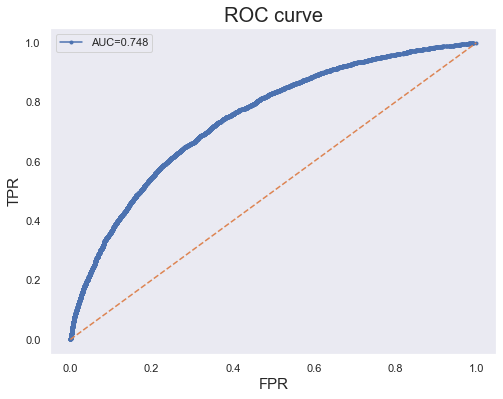

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

# Modele Catboost

Matrice de poid

In [26]:
weight = np.ones((len(X_train),), dtype=int)
for i in range(len(X_train)):
    if y_train.iloc[i] == 0:
        weight[i] = 1
    else:
        weight[i] = 11

In [27]:
from sklearn.utils import class_weight
cw = list(class_weight.compute_class_weight('balanced',
                                             np.unique(y_train),
                                             y_train))
cw

[0.5455296668328674, 5.990925310692752]

Preparation des jeux de données et de validation

In [28]:
cb_train_data = Pool(X_train[selected_features], label=y_train, feature_names=selected_features, weight=weight)
cb_valid_data = Pool(X_val[selected_features], feature_names=selected_features, label=y_val)
cb_test_data = Pool(X_test[selected_features], feature_names=selected_features, label=y_test)

In [29]:
def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

Recherche des hyperparametres

In [31]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
clf= CatBoostClassifier( eval_metric='AUC')
grid_search_result = clf.grid_search(params, X=cb_train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.75641664
bestIteration = 299

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.7564166	best: 0.7564166 (0)	total: 11.6s	remaining: 5m

bestTest = 0.7710575242
bestIteration = 293

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.7710575	best: 0.7710575 (1)	total: 22.6s	remaining: 4m 42s

bestTest = 0.7704313822
bestIteration = 282

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.7704314	best: 0.7710575 (1)	total: 33s	remaining: 4m 24s

bestTest = 0.7560502274
bestIteration = 299

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.7560502	best: 0.7710575 (1)	total: 43.8s	remaining: 4m 11s

bestTes

In [32]:
grid_search_result

{'params': {'depth': 4,
  'l2_leaf_reg': 9,
  'iterations': 300,
  'learning_rate': 0.15},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [33]:
cb = CatBoostClassifier(eval_metric='AUC', depth = 4, l2_leaf_reg = 9, iterations = 300, learning_rate=0.15 )

cb.fit(cb_train_data,eval_set=cb_valid_data,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6989568	best: 0.6989568 (0)	total: 51.3ms	remaining: 15.3s
1:	test: 0.7126960	best: 0.7126960 (1)	total: 90.4ms	remaining: 13.5s
2:	test: 0.7209089	best: 0.7209089 (2)	total: 131ms	remaining: 13s
3:	test: 0.7228684	best: 0.7228684 (3)	total: 170ms	remaining: 12.6s
4:	test: 0.7272333	best: 0.7272333 (4)	total: 206ms	remaining: 12.2s
5:	test: 0.7277322	best: 0.7277322 (5)	total: 247ms	remaining: 12.1s
6:	test: 0.7298998	best: 0.7298998 (6)	total: 299ms	remaining: 12.5s
7:	test: 0.7314925	best: 0.7314925 (7)	total: 360ms	remaining: 13.1s
8:	test: 0.7329335	best: 0.7329335 (8)	total: 426ms	remaining: 13.8s
9:	test: 0.7363237	best: 0.7363237 (9)	total: 489ms	remaining: 14.2s
10:	test: 0.7378491	best: 0.7378491 (10)	total: 543ms	remaining: 14.3s
11:	test: 0.7391917	best: 0.7391917 (11)	total: 594ms	remaining: 14.3s
12:	test: 0.7413963	best: 0.7413963 (12)	total: 657ms	remaining: 14.5s
13:	test: 0.7431564	best: 0.7431564 (13)	total: 719ms	remaining: 14.7s
14:	test: 0.7444539	best: 

119:	test: 0.7709322	best: 0.7709322 (119)	total: 6.76s	remaining: 10.1s
120:	test: 0.7709605	best: 0.7709605 (120)	total: 6.81s	remaining: 10.1s
121:	test: 0.7710368	best: 0.7710368 (121)	total: 6.86s	remaining: 10s
122:	test: 0.7712421	best: 0.7712421 (122)	total: 6.92s	remaining: 9.95s
123:	test: 0.7714222	best: 0.7714222 (123)	total: 6.96s	remaining: 9.88s
124:	test: 0.7714280	best: 0.7714280 (124)	total: 7.01s	remaining: 9.81s
125:	test: 0.7715417	best: 0.7715417 (125)	total: 7.05s	remaining: 9.74s
126:	test: 0.7716457	best: 0.7716457 (126)	total: 7.09s	remaining: 9.66s
127:	test: 0.7716673	best: 0.7716673 (127)	total: 7.13s	remaining: 9.59s
128:	test: 0.7715998	best: 0.7716673 (127)	total: 7.19s	remaining: 9.53s
129:	test: 0.7717367	best: 0.7717367 (129)	total: 7.24s	remaining: 9.47s
130:	test: 0.7717761	best: 0.7717761 (130)	total: 7.3s	remaining: 9.42s
131:	test: 0.7719219	best: 0.7719219 (131)	total: 7.36s	remaining: 9.37s
132:	test: 0.7720635	best: 0.7720635 (132)	total: 7.42

233:	test: 0.7761397	best: 0.7761397 (233)	total: 13.2s	remaining: 3.73s
234:	test: 0.7762364	best: 0.7762364 (234)	total: 13.3s	remaining: 3.67s
235:	test: 0.7762974	best: 0.7762974 (235)	total: 13.3s	remaining: 3.61s
236:	test: 0.7763730	best: 0.7763730 (236)	total: 13.4s	remaining: 3.55s
237:	test: 0.7763549	best: 0.7763730 (236)	total: 13.4s	remaining: 3.49s
238:	test: 0.7764024	best: 0.7764024 (238)	total: 13.4s	remaining: 3.43s
239:	test: 0.7764410	best: 0.7764410 (239)	total: 13.5s	remaining: 3.37s
240:	test: 0.7764910	best: 0.7764910 (240)	total: 13.5s	remaining: 3.31s
241:	test: 0.7764260	best: 0.7764910 (240)	total: 13.6s	remaining: 3.25s
242:	test: 0.7764579	best: 0.7764910 (240)	total: 13.6s	remaining: 3.19s
243:	test: 0.7764446	best: 0.7764910 (240)	total: 13.7s	remaining: 3.14s
244:	test: 0.7763672	best: 0.7764910 (240)	total: 13.7s	remaining: 3.08s
245:	test: 0.7764285	best: 0.7764910 (240)	total: 13.8s	remaining: 3.03s
246:	test: 0.7765079	best: 0.7765079 (246)	total: 1

In [35]:
from catboost.utils import get_roc_curve
curve = get_roc_curve(cb, cb_test_data)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

In [36]:
roc_auc

0.7737027992171126

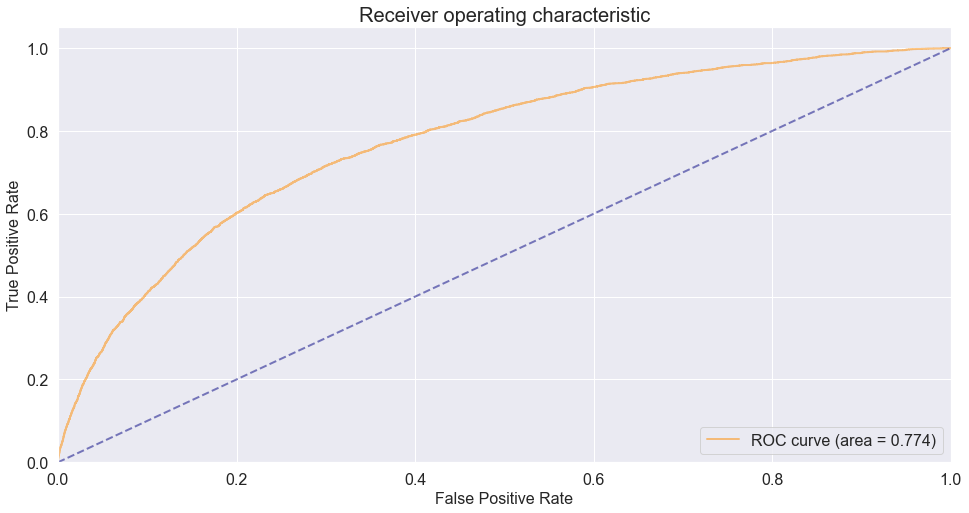

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [38]:
y_pred = cb.predict(X_test[selected_features])

In [39]:
y_pred_prob = cb.predict_proba(X_test[selected_features])[:,1]

In [40]:
print('The test AUC score is :', roc_auc_score(y_test, y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format(
    (1-accuracy_score(y_test, y_pred))*100))

The test AUC score is : 0.7737027992171125
The percentage of misclassified points 28.54% :


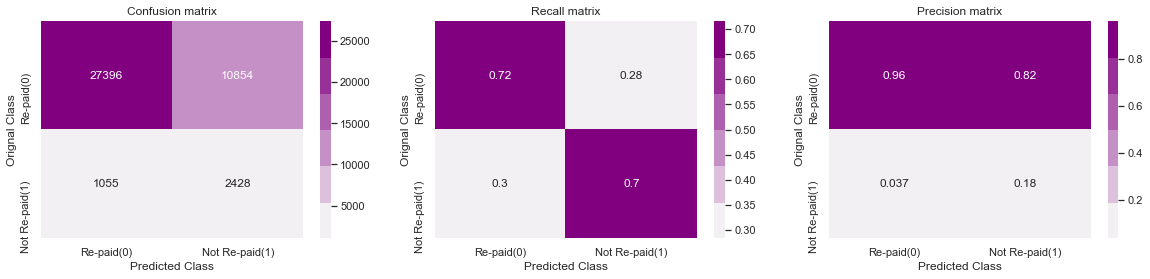

In [41]:
plot_confusion_matrix(y_test,y_pred)

In [42]:
    y_pred_prob = cb.predict_proba(X_val[selected_features])[:,1]
    roc_auc_score(y_val,y_pred_prob)
    

0.7777303166266027

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     38250
           1       0.18      0.70      0.29      3483

    accuracy                           0.71     41733
   macro avg       0.57      0.71      0.56     41733
weighted avg       0.90      0.71      0.78     41733



In [44]:
y_pred_prob = cb.predict_proba(X_test[selected_features])[:,1]
pred=pd.DataFrame({'y':y_test,'proba':y_pred_prob})

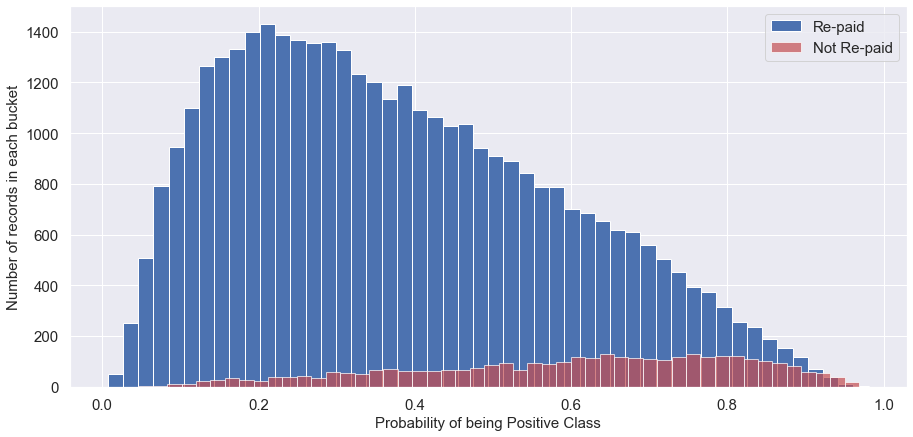

In [45]:
plt.figure(figsize=(15,7))
plt.hist(pred['proba'].loc[pred['y']==0], bins=50, label='Re-paid')
plt.hist(pred['proba'].loc[pred['y']==1], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

## Validation croisée

In [46]:
cb.get_params()

{'iterations': 300,
 'learning_rate': 0.15,
 'depth': 4,
 'l2_leaf_reg': 9,
 'eval_metric': 'AUC'}

In [47]:
def print_cv_summary(cv_data):
    cv_data.head(10)

    best_value = cv_data['test-AUC-mean'].max()
    best_iter = cv_data['test-AUC-mean'].values.argmax()

    print('Best validation AUC score : {:.4f}±{:.4f} on step {}'.format(
        best_value,
        cv_data['test-AUC-std'][best_iter],
        best_iter)
    )

In [48]:
from catboost import cv

param = {'iterations': 300,
 'learning_rate': 0.15,
 'depth': 4,
 'l2_leaf_reg': 9,
 'eval_metric': 'AUC',
 'loss_function': 'Logloss'}

cv_data = cv(
    params = param,
    pool = cb_train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

print_cv_summary(cv_data)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best validation AUC score : 0.7767±0.0039 on step 287


In [49]:
print_cv_summary(cv_data)

Best validation AUC score : 0.7767±0.0039 on step 287


In [50]:
cv_data

iterations  test-AUC-mean  test-AUC-std  test-Logloss-mean  \
0             0         0.6940        0.0033             0.6751   
1             1         0.7059        0.0038             0.6622   
2             2         0.7136        0.0032             0.6515   
3             3         0.7171        0.0039             0.6433   
4             4         0.7184        0.0035             0.6373   
5             5         0.7204        0.0045             0.6322   
6             6         0.7231        0.0045             0.6278   
7             7         0.7252        0.0039             0.6242   
8             8         0.7282        0.0036             0.6209   
9             9         0.7300        0.0038             0.6185   
10           10         0.7326        0.0045             0.6160   
11           11         0.7343        0.0046             0.6141   
12           12         0.7363        0.0046             0.6121   
13           13         0.7384        0.0041             0.6101   
14           14         0.7397        0.0037             0.6085   
15           15         0.7410        0.0034             0.6071   
16           16         0.7422        0.0032             0.6057   
17           17         0.7430        0.0032             0.6046   
18           18         0.7438        0.0035             0.6036   
19           19         0.7447        0.0035             0.6025   
20           20         0.7457        0.0037             0.6015   
21           21         0.7466        0.0037             0.6005   
22           22         0.7475        0.0040             0.5997   
23           23         0.7482        0.0039             0.5988   
24           24         0.7490        0.0037             0.5980   
25           25         0.7501        0.0039             0.5970   
26           26         0.7508        0.0037             0.5962   
27           27         0.7512        0.0038             0.5957   
28           28         0.7517        0.0040             0.5951   
29           29         0.7521        0.0041             0.5946   
30           30         0.7526        0.0042             0.5941   
31           31         0.7533        0.0042             0.5934   
32           32         0.7540        0.0044             0.5927   
33           33         0.7544        0.0043             0.5922   
34           34         0.7548        0.0044             0.5918   
35           35         0.7551        0.0043             0.5915   
36           36         0.7554        0.0044             0.5911   
37           37         0.7558        0.0044             0.5907   
38           38         0.7561        0.0043             0.5902   
39           39         0.7566        0.0042             0.5898   
40           40         0.7568        0.0040             0.5895   
41           41         0.7572        0.0042             0.5890   
42           42         0.7575        0.0042             0.5887   
43           43         0.7578        0.0043             0.5884   
44           44         0.7581        0.0043             0.5881   
45           45         0.7583        0.0043             0.5878   
46           46         0.7587        0.0043             0.5874   
47           47         0.7590        0.0041             0.5871   
48           48         0.7591        0.0041             0.5868   
49           49         0.7593        0.0041             0.5866   
50           50         0.7595        0.0041             0.5864   
51           51         0.7597        0.0042             0.5861   
52           52         0.7599        0.0043             0.5859   
53           53         0.7601        0.0043             0.5856   
54           54         0.7604        0.0043             0.5853   
55           55         0.7606        0.0042             0.5850   
56           56         0.7610        0.0042             0.5847   
57           57         0.7611        0.0042             0.5845   
58           58         0.7614        0.0042        

In [51]:
with open('model_cb_imp.pkl','wb') as fp:
    pickle.dump(cb, fp)

In [52]:
feature_importance = cb.get_feature_importance(data=None,
                       
                       prettified=True,
                       thread_count=-1,
                       verbose=False)

In [53]:
feature_importance

Feature Id  Importances
0                              EXT_SOURCE_3      13.7249
1                             LENGTH_CREDIT       8.6982
2                           EXT_SOURCE_MEAN       8.6939
3                            EXT_SOURCE_SUM       5.9607
4                               YEARS_BIRTH       4.7013
5                              EXT_SOURCE_1       3.6969
6                        CNT_LOANS_APPROVED       3.2919
7                           AMT_GOODS_PRICE       3.2335
8                   MEAN_CNT_PAYMENT_FUTURE       2.8101
9                                  GENDER_M       2.4563
10                           EMPLOYED_RATIO       2.2858
11                      CNT_LESS_PAYMENT_3Y       2.0580
12                               AMT_CREDIT       2.0041
13                           BUR_TOT_CREDIT       1.8209
14                      BUR_TOT_CREDIT_DEBT       1.7072
15                    BUR_TOT_CREDIT_ACTIVE       1.7045
16                             EXT_SOURCE_2       1.6638
17                        CNT_LOANS_REFUSED       1.6004
18                              AMT_ANNUITY       1.5084
19                       GLOBAL_SUM_ANNUITY       1.3690
20                      BUR_MIN_DAYS_CREDIT       1.3653
21                      CNT_LESS_PAYMENT_1Y       1.3368
22                                 RATE_DOC       1.2964
23                   DAYS_LAST_PHONE_CHANGE       1.2802
24                      BUR_CNT_CLOSED_LOAN       1.2041
25                     ANNUITY_INCOME_RATIO       1.1595
26               EDUCATION_Higher_education       1.1554
27                       TOT_ACTIVE_ANNUITY       1.0486
28                      BUR_CNT_ACTIVE_LOAN       0.9858
29                                    CAR_Y       0.9379
30              REGION_RATING_CLIENT_W_CITY       0.7994
31                      CNT_ACTIVE_REV_LOAN       0.7917
32                       BUR_CNT_REQUEST_1Y       0.7574
33                           YEARS_EMPLOYED       0.7480
34                           FAMILY_Married       0.7326
35                      CREDIT_INCOME_RATIO       0.6503
36           POS_MEAN_CNT_INSTALMENT_FUTURE       0.6260
37                        INCOME_PER_PERSON       0.5544
38  EDUCATION_Secondary___secondary_special       0.5468
39                           INCOME_Working       0.4893
40                          REMAIN_FOR_LIFE       0.4629
41                   GLOBAL_REMAIN_FOR_LIFE       0.4484
42                          BUR_TOT_ANNUITY       0.4313
43                   BUR_TOT_CREDIT_OVERDUE       0.4224
44                           CNT_INSURED_ON       0.4136
45                     CNT_ACTIVE_CASH_LOAN       0.4049
46                 DEF_60_CNT_SOCIAL_CIRCLE       0.4016
47        GLOBAL_REMAIN_FOR_LIFE_PER_PERSON       0.3847
48                   BUR_TOT_ANNUITY_ACTIVE       0.3397
49               REMAIN_FOR_LIFE_PER_PERSON       0.3192
50               GLOBAL_CREDIT_INCOME_RATIO       0.2826
51                 OBS_30_CNT_SOCIAL_CIRCLE       0.2064
52                         AMT_INCOME_TOTAL       0.2049
53                               DEF_OBS_30       0.1971
54                        POS_CNT_DPD_60_1Y       0.1852
55                          CNT_ACTIVE_LOAN       0.1825
56              HOUSING_Municipal_apartment       0.1693
57                     CNT_ACTIVE_CONS_LOAN       0.1678
58                     INCOME_State_servant       0.1411
59                            CNT_DPD_60_3Y       0.1410
60                     REGION_RATING_CLIENT       0.1376
61                 OBS_60_CNT_SOCIAL_CIRCLE       0.1151
62                 HOUSING_Office_apartment       0.1034
63                     BUR_MAX_DAYS_OVERDUE       0.0964
64                          CNT_FAM_MEMBERS       0.0628
65                EDUCATION_Lower_secondary       0.0502
66                                 REALTY_Y       0.0373
67                             CNT_CHILDREN       0.0350
68                       CNT_LOANS_CANCELED       0.0000

Feature importance

In [54]:
feature_importance = cb.get_feature_importance(data=cb_train_data,
                       #type = 'ShapValues',
                       prettified=True,
                       thread_count=-1,
                       verbose=False)

In [55]:
feature_importance

Feature Id  Importances
0                              EXT_SOURCE_3      13.7249
1                             LENGTH_CREDIT       8.6982
2                           EXT_SOURCE_MEAN       8.6939
3                            EXT_SOURCE_SUM       5.9607
4                               YEARS_BIRTH       4.7013
5                              EXT_SOURCE_1       3.6969
6                        CNT_LOANS_APPROVED       3.2919
7                           AMT_GOODS_PRICE       3.2335
8                   MEAN_CNT_PAYMENT_FUTURE       2.8101
9                                  GENDER_M       2.4563
10                           EMPLOYED_RATIO       2.2858
11                      CNT_LESS_PAYMENT_3Y       2.0580
12                               AMT_CREDIT       2.0041
13                           BUR_TOT_CREDIT       1.8209
14                      BUR_TOT_CREDIT_DEBT       1.7072
15                    BUR_TOT_CREDIT_ACTIVE       1.7045
16                             EXT_SOURCE_2       1.6638
17                        CNT_LOANS_REFUSED       1.6004
18                              AMT_ANNUITY       1.5084
19                       GLOBAL_SUM_ANNUITY       1.3690
20                      BUR_MIN_DAYS_CREDIT       1.3653
21                      CNT_LESS_PAYMENT_1Y       1.3368
22                                 RATE_DOC       1.2964
23                   DAYS_LAST_PHONE_CHANGE       1.2802
24                      BUR_CNT_CLOSED_LOAN       1.2041
25                     ANNUITY_INCOME_RATIO       1.1595
26               EDUCATION_Higher_education       1.1554
27                       TOT_ACTIVE_ANNUITY       1.0486
28                      BUR_CNT_ACTIVE_LOAN       0.9858
29                                    CAR_Y       0.9379
30              REGION_RATING_CLIENT_W_CITY       0.7994
31                      CNT_ACTIVE_REV_LOAN       0.7917
32                       BUR_CNT_REQUEST_1Y       0.7574
33                           YEARS_EMPLOYED       0.7480
34                           FAMILY_Married       0.7326
35                      CREDIT_INCOME_RATIO       0.6503
36           POS_MEAN_CNT_INSTALMENT_FUTURE       0.6260
37                        INCOME_PER_PERSON       0.5544
38  EDUCATION_Secondary___secondary_special       0.5468
39                           INCOME_Working       0.4893
40                          REMAIN_FOR_LIFE       0.4629
41                   GLOBAL_REMAIN_FOR_LIFE       0.4484
42                          BUR_TOT_ANNUITY       0.4313
43                   BUR_TOT_CREDIT_OVERDUE       0.4224
44                           CNT_INSURED_ON       0.4136
45                     CNT_ACTIVE_CASH_LOAN       0.4049
46                 DEF_60_CNT_SOCIAL_CIRCLE       0.4016
47        GLOBAL_REMAIN_FOR_LIFE_PER_PERSON       0.3847
48                   BUR_TOT_ANNUITY_ACTIVE       0.3397
49               REMAIN_FOR_LIFE_PER_PERSON       0.3192
50               GLOBAL_CREDIT_INCOME_RATIO       0.2826
51                 OBS_30_CNT_SOCIAL_CIRCLE       0.2064
52                         AMT_INCOME_TOTAL       0.2049
53                               DEF_OBS_30       0.1971
54                        POS_CNT_DPD_60_1Y       0.1852
55                          CNT_ACTIVE_LOAN       0.1825
56              HOUSING_Municipal_apartment       0.1693
57                     CNT_ACTIVE_CONS_LOAN       0.1678
58                     INCOME_State_servant       0.1411
59                            CNT_DPD_60_3Y       0.1410
60                     REGION_RATING_CLIENT       0.1376
61                 OBS_60_CNT_SOCIAL_CIRCLE       0.1151
62                 HOUSING_Office_apartment       0.1034
63                     BUR_MAX_DAYS_OVERDUE       0.0964
64                          CNT_FAM_MEMBERS       0.0628
65                EDUCATION_Lower_secondary       0.0502
66                                 REALTY_Y       0.0373
67                             CNT_CHILDREN       0.0350
68                       CNT_LOANS_CANCELED       0.0000

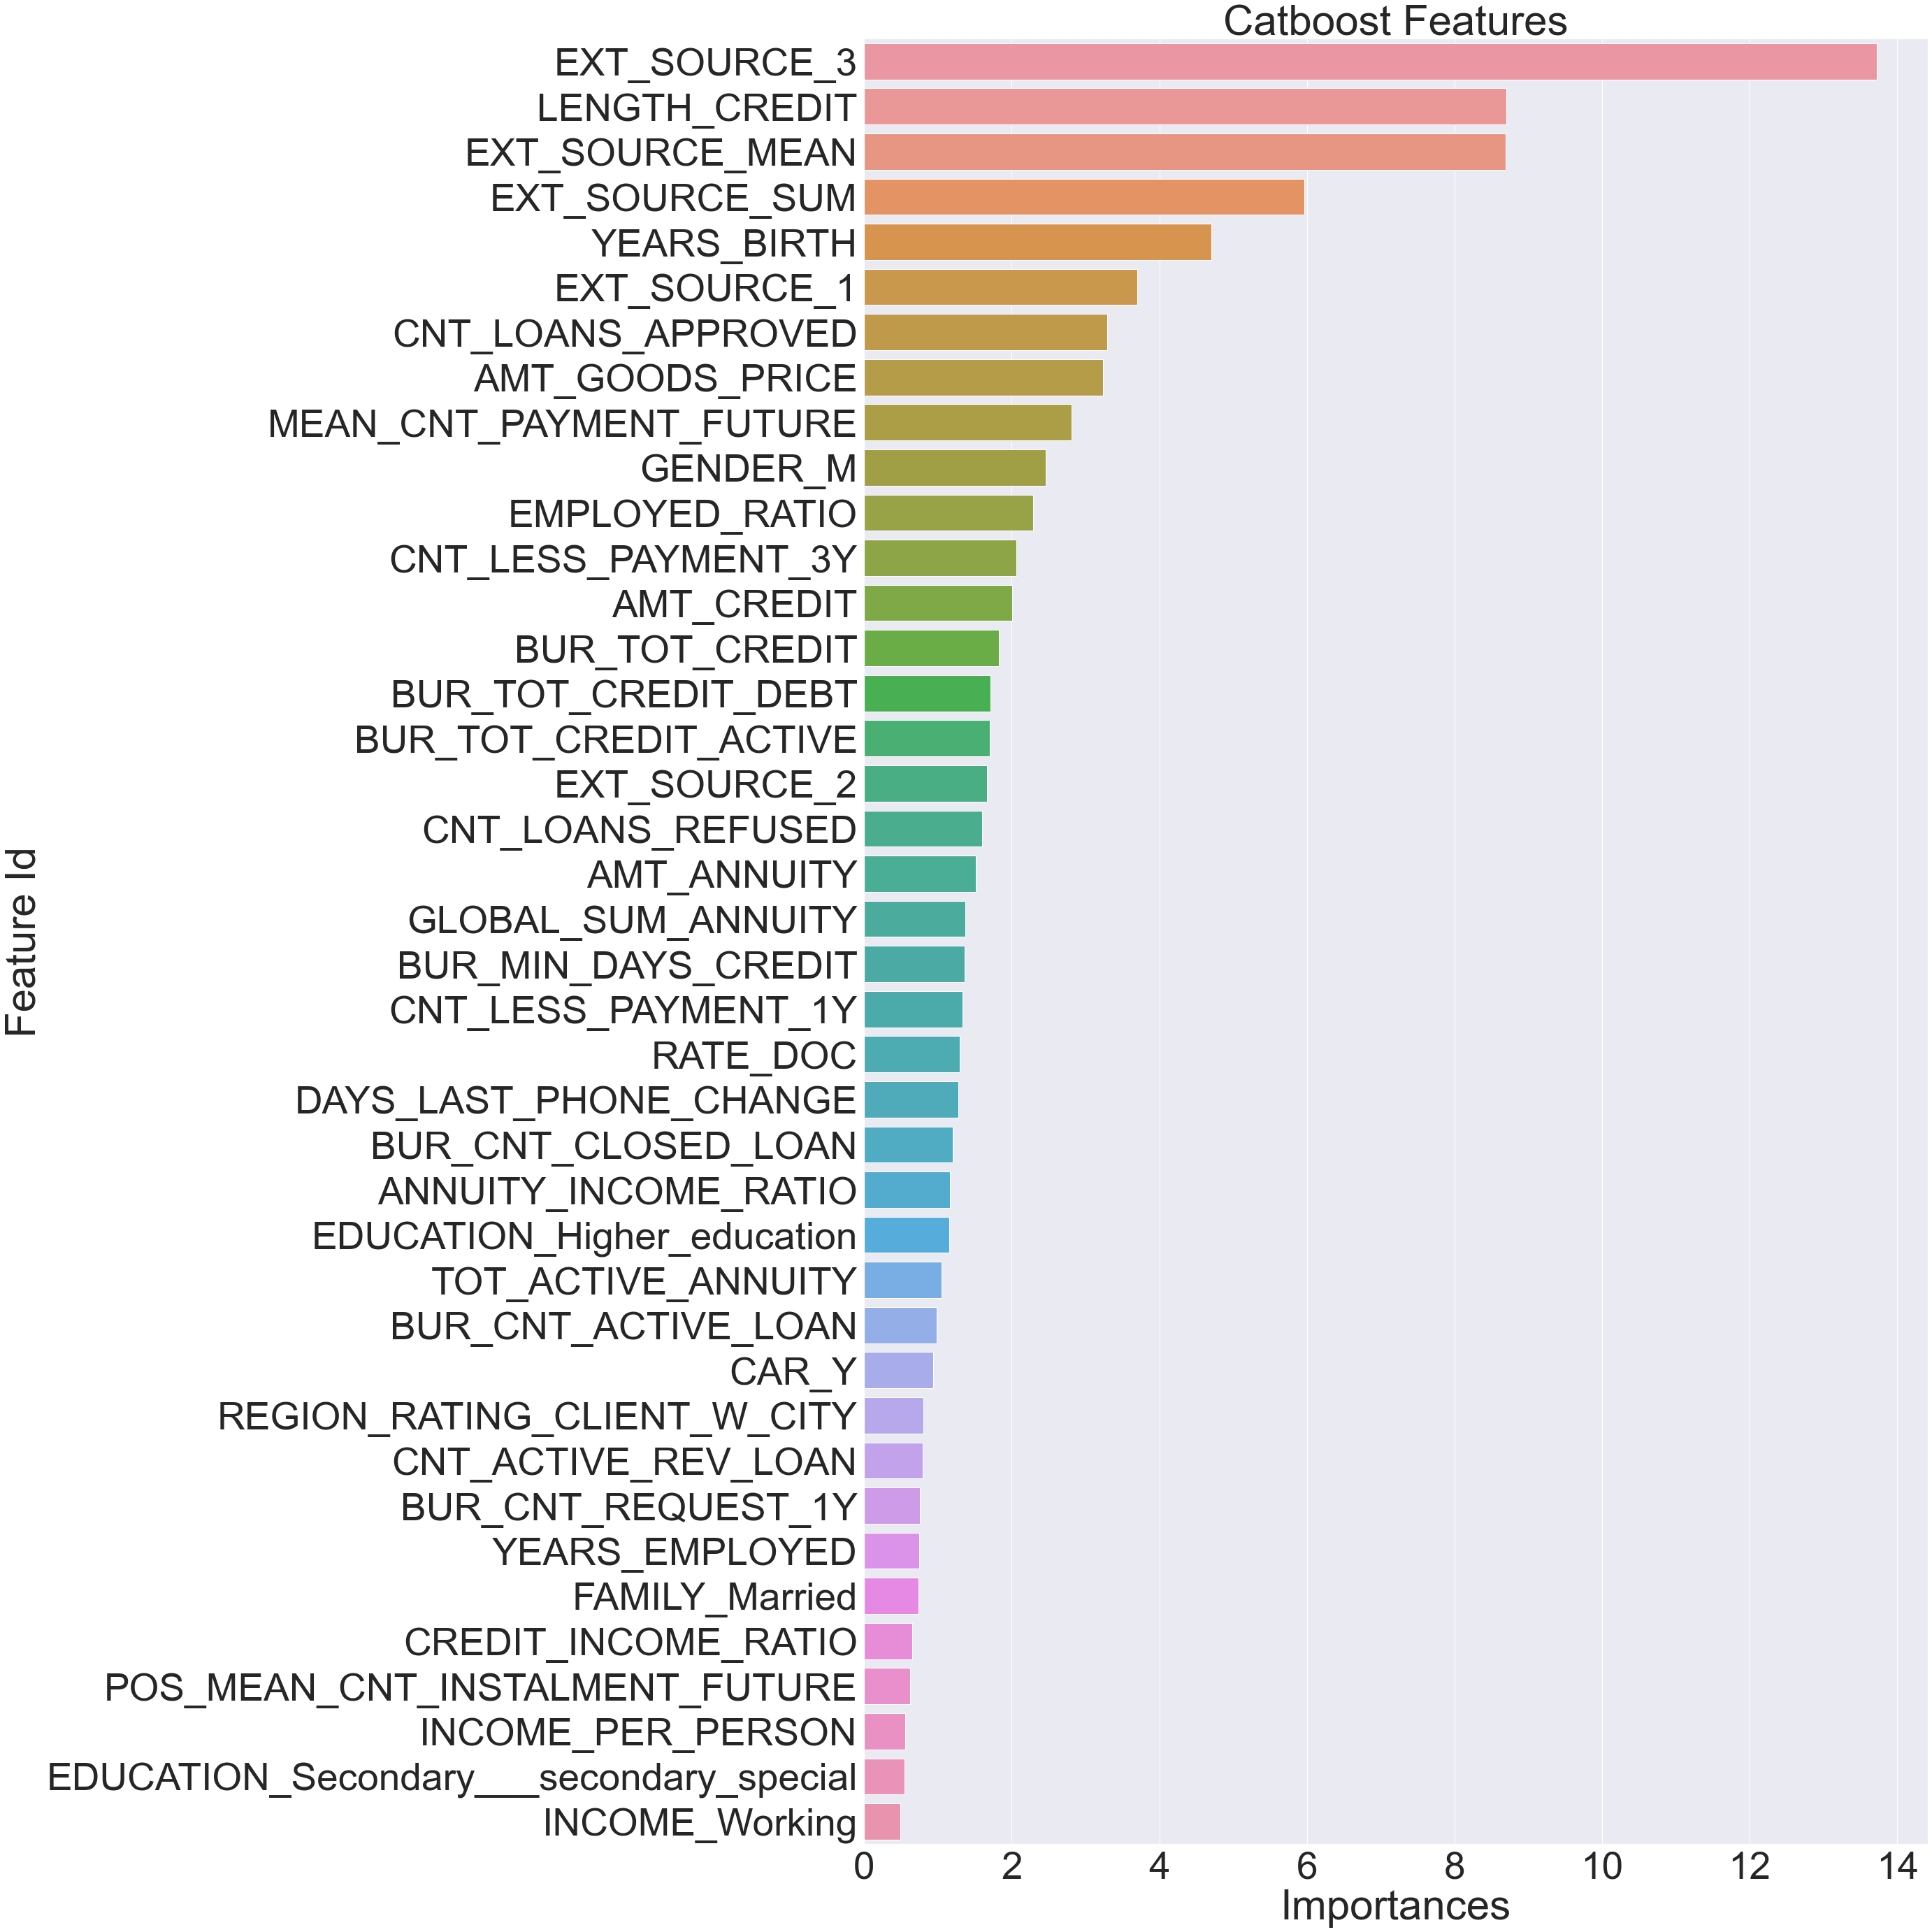

In [58]:

plt.figure(figsize=(40, 40))
sns.set(font_scale = 5)
sns.barplot(x="Importances", y="Feature Id", data=feature_importance[0:40])
plt.title('Catboost Features')
plt.tight_layout()
#plt.savefig('lgbm_importances-01.png')
plt.show()
sns.set(font_scale = 1)

SHARP

In [56]:
feature_importance_shap = cb.get_feature_importance(data=cb_train_data,
                       type = 'ShapValues',
                       prettified=True,
                       thread_count=-1,
                       verbose=False)

In [57]:
feature_importance_shap

0       1       2       3       4       5       6       7   \
0       0.0119  0.0858  0.8128 -0.1429 -0.0434 -0.0092 -0.0476  0.0360   
1      -0.6254 -0.2968 -0.4490  0.0222 -0.1517 -0.1068 -0.0469 -0.0221   
2       0.0026  0.0833 -0.4367 -0.0129 -0.0599 -0.0453 -0.0366 -0.0587   
3      -0.1346  0.1242  0.0001  0.1031 -0.0671 -0.1144 -0.0494 -0.0387   
4       0.1810  0.0495 -0.0050 -0.1653  0.2205  0.0254  0.1199  0.0037   
...        ...     ...     ...     ...     ...     ...     ...     ...   
194748  0.0006 -0.1590  0.8173  0.0236 -0.1412  0.0102  0.2346  0.0361   
194749  0.0203 -0.1780 -0.6583 -0.2888 -0.3126  0.0105 -0.0535 -0.0062   
194750 -0.0635 -0.1163 -0.4754  0.0257 -0.0674  0.0053 -0.0500 -0.1851   
194751 -0.0411  0.0029 -0.5218  0.0492  0.1999  0.0576  0.1075  0.0216   
194752  0.1812 -0.3745 -0.0768  0.2782  0.2067  0.0141 -0.0483  0.0333   

            8       9       10      11      12      13      14      15  \
0      -0.1201 -0.0123 -0.0452  0.0523  0.1925  0.1950 -0.0442  0.0534   
1      -0.0299  0.0033 -0.3459 -0.0632 -0.0284 -0.0512 -0.0586 -0.1352   
2      -0.0101 -0.0151 -0.0452  0.0551  0.0704  0.0106 -0.0172  0.0483   
3      -0.0348 -0.0274  0.1334 -0.1292 -0.0554  0.0906 -0.0619  0.0507   
4      -0.0563  0.0141  0.1276 -0.0219  0.1135  0.0462 -0.0186 -0.1765   
...        ...     ...     ...     ...     ...     ...     ...     ...   
194748 -0.0996  0.0201  0.1205  0.0215 -0.0388  0.0613 -0.0498  0.0379   
194749 -0.1335 -0.0128 -0.4546  0.1097  0.1532  0.1600 -0.0039 -0.1783   
194750 -0.0098 -0.0082  0.1154 -0.1433 -0.0400 -0.0561 -0.0659  0.0812   
194751  0.0762  0.0206  0.1455 -0.0742 -0.0481 -0.0377 -0.0254  0.0317   
194752  0.1720 -0.0055  0.1838 -0.0982  0.2336 -0.0741  0.0377  0.0937   

            16      17      18      19      20      21      22      23  \
0       0.0679  0.1159  0.0236  0.0014 -0.0391  0.0101 -0.0820  0.0599   
1       0.0794  0.0593 -0.0425  0.0711  0.0854  0.0080  0.1961 -0.3088   
2       0.0710 -0.0686  0.0010  0.0304 -0.0340  0.0084 -0.0917  0.0013   
3      -0.0248 -0.0146  0.0193 -0.0289  0.0037  0.0060 -0.0800  0.0677   
4      -0.0284 -0.0859 -0.0893 -0.0251  0.0161  0.0017 -0.0862 -0.0639   
...        ...     ...     ...     ...     ...     ...     ...     ...   
194748 -0.0669 -0.0192  0.0002 -0.0150  0.0235  0.0003  0.0052 -0.0541   
194749  0.0138  0.0443 -0.1075 -0.0000  0.0780 -0.0002 -0.0988 -0.0419   
194750 -0.0299 -0.1709  0.0342 -0.0016 -0.0355 -0.0072  0.0755 -0.1218   
194751 -0.0342 -0.1608 -0.0031  0.0025 -0.0177 -0.0015  0.1984  0.0149   
194752  0.0451  0.0120  0.0211  0.0028 -0.0115  0.0097 -0.0963  0.0653   

            24      25      26      27      28      29      30      31  \
0       0.0174  0.0302 -0.0083  0.2244 -0.0001 -0.0627 -0.0015 -0.0090   
1       0.0205  0.1415 -0.0052 -0.1387 -0.0150 -0.0599 -0.0051  0.0109   
2       0.0132 -0.0773 -0.0078 -0.0988 -0.0419 -0.0353  0.0231  0.0001   
3       0.0131  0.2827  0.0013 -0.1370  0.0040 -0.0343 -0.0034 -0.0025   
4      -0.0286 -0.0884 -0.0053 -0.1316 -0.0004  0.2506 -0.0038 -0.0054   
...        ...     ...     ...     ...     ...     ...     ...     ...   
194748  0.0029  0.2983 -0.0186 -0.1365  0.0134  0.3143 -0.0069 -0.0004   
194749  0.0104 -0.0871  0.0276 -0.1418 -0.0069 -0.0609 -0.0070 -0.0407   
194750  0.0143 -0.0817 -0.0104 -0.1524 -0.0497 -0.0299  0.0252 -0.0073   
194751 -0.0875 -0.0766 -0.0200 -0.1511 -0.0046 -0.0321  0.0245 -0.0018   
194752  0.0128 -0.0861 -0.0175  0.1611 -0.0053 -0.0277 -0.0024 -0.0013   

            32      33      34      35      36      37      38      39  \
0      -0.0240  0.0015  0.0118 -0.0364  0.0138  0.0059  0.1025  0.0169   
1      -0.0424  0.0069  0.0319 -0.0432  0.0119 -0.2053  0.0038  0.0008   
2      -0.0272  0.0103 -0.0110 -0.0389  0.0162  0.0445  0.0725  0.0004   
3      -0.0267  0.0026 -0.0053 -0.0413  0.0169  0.0120 -0.0037  0.0008   
4      -0.0287 -0.0075  0.0107 -0.0450  0.0136  0.2310 -0.0065 -0.0036   
...        .

## Modele LightGBM

Evaluation des poids. 1 pour la classe 0 et 11 pour la classe 1 fortement désiquilibrée < 10%

Creation du tableau de poids

In [57]:
weight = np.ones((len(X_train),), dtype=int)
for i in range(len(X_train)):
    if y_train.iloc[i] == 0:
        weight[i] = 1
    else:
        weight[i] = 11

In [59]:
weight.shape

(194753,)

Creation des dataset lightgbm train et valid

In [60]:
train_data = lgb.Dataset(
    X_train[selected_features], label=y_train, weight=weight)
valid_data = lgb.Dataset(X_val[selected_features], label=y_val)

Recherche du meilleur max_depth

In [61]:
cv_auc_score = []

max_depth = [3, 5, 7, 10]
for i in max_depth:
    print("i:",i)
    params = {'boosting_type': 'gbdt',
              'max_depth': i,
              'objective': 'binary',
              'nthread': 5,
              'num_leaves': 32,
              'learning_rate': 0.05,
              'max_bin': 512,
              'subsample_for_bin': 200,
              'subsample': 0.7,
              'subsample_freq': 1,
              'colsample_bytree': 0.8,
              'reg_alpha': 20,
              'reg_lambda': 20,
              'min_split_gain': 0.5,
              'min_child_weight': 1,
              'min_child_samples': 10,
              'scale_pos_weight': 1,
              'num_class': 1,
              'metric': 'auc'
              }
    lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data,
                 early_stopping_rounds=100,
                 verbose_eval=10
                 )
    print("i:",i)
    y_pred_prob = lgbm.predict(X_val[selected_features])
    cv_auc_score.append(roc_auc_score(y_val, y_pred_prob))
    print('For  max_depth {0} and some other parameters, cross validation AUC score {1}'.format(
    i, roc_auc_score(y_val, y_pred_prob)))
print('The optimal  max_depth: ', max_depth[np.argmax(cv_auc_score)])

i: 3
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Info] Number of positive: 16254, number of negative: 178499
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 194753, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500413 -> initscore=0.001651
[LightGBM] [Info] Start training from score 0.001651
Training until validation scores don't improve for 100 rounds
[10]	valid_0's auc: 0.724453
[20]	valid_0's auc: 0.727757
[30]	valid_0's auc: 0.73294
[40]	valid_0's auc: 0.738843
[50]	valid_0's auc: 0.744593
[60]	valid_0's auc: 0.74817
[70]	valid_0's auc: 0.750381
[80]	valid_0's auc: 0.752353
[90]	valid_0's auc: 0.754

[50]	valid_0's auc: 0.753674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's auc: 0.757446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's auc: 0.759858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[240]	valid_0's auc: 0.774507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	valid_0's auc: 0.774683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[430]	valid_0's auc: 0.778099
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[440]	valid_0's auc: 0.777996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[600]	valid_0's auc: 0.778895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[610]	valid_0's auc: 0.778924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[620]	valid_0's auc: 0.77892
[LightGBM] 

[200]	valid_0's auc: 0.775673
[210]	valid_0's auc: 0.776003
[220]	valid_0's auc: 0.77636
[230]	valid_0's auc: 0.776745
[240]	valid_0's auc: 0.777034
[250]	valid_0's auc: 0.777195
[260]	valid_0's auc: 0.777458
[270]	valid_0's auc: 0.777453
[280]	valid_0's auc: 0.777454
[290]	valid_0's auc: 0.777681
[300]	valid_0's auc: 0.777681
[310]	valid_0's auc: 0.777713
[320]	valid_0's auc: 0.777728
[330]	valid_0's auc: 0.777762
[340]	valid_0's auc: 0.777758
[350]	valid_0's auc: 0.777875
[360]	valid_0's auc: 0.777821
[370]	valid_0's auc: 0.777936
[380]	valid_0's auc: 0.778059
[390]	valid_0's auc: 0.778214
[400]	valid_0's auc: 0.778284
[410]	valid_0's auc: 0.77826
[420]	valid_0's auc: 0.778121
[430]	valid_0's auc: 0.778131
[440]	valid_0's auc: 0.778185
[450]	valid_0's auc: 0.778223
[460]	valid_0's auc: 0.778188
[470]	valid_0's auc: 0.778083
[480]	valid_0's auc: 0.778005
[490]	valid_0's auc: 0.778083
Early stopping, best iteration is:
[397]	valid_0's auc: 0.778345
i: 10
For  max_depth 10 and some othe

In [62]:
 y_pred_prob 

array([0.22448265, 0.28474737, 0.17873863, ..., 0.06848251, 0.47147032,
       0.63474935])

Evaluation du modele

In [63]:

params = {'boosting_type': 'gbdt',
          'max_depth': max_depth[np.argmax(cv_auc_score)],
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 32,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 20,
          'reg_lambda': 20,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight': 1,
          'num_class': 1,
          'metric': 'auc'
          }
lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data,
                 early_stopping_rounds=100,
                 verbose_eval=10
                 )
y_pred_prob = lgbm.predict(X_train[selected_features])
print('For best max_depth {0}, The Train AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],
                                                                  roc_auc_score(y_train, y_pred_prob)))
y_pred_prob = lgbm.predict(X_val[selected_features])
print('For best max_depth {0}, The Cross validated AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],
                                                                            roc_auc_score(y_val, y_pred_prob)))
y_pred_prob = lgbm.predict(X_test[selected_features])
print('For best max_depth {0}, The Test AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],roc_auc_score(y_test, y_pred_prob)))


[LightGBM] [Info] Number of positive: 16254, number of negative: 178499
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 194753, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500413 -> initscore=0.001651
[LightGBM] [Info] Start training from score 0.001651
Training until validation scores don't improve for 100 rounds
[10]	valid_0's auc: 0.724453
[20]	valid_0's auc: 0.727757
[30]	valid_0's auc: 0.73294
[40]	valid_0's auc: 0.738843
[50]	valid_0's auc: 0.744593
[60]	valid_0's auc: 0.74817
[70]	valid_0's auc: 0.750381
[80]	valid_0's auc: 0.752353
[90]	valid_0's auc: 0.754339
[100]	valid_0's auc: 0.756227
[110]	valid_0's auc: 0.75756
[120]	valid_0's auc: 0.759067
[130]	valid_0's auc: 0.760389

In [64]:
lgbm.params

{'boosting_type': 'gbdt',
 'max_depth': 3,
 'objective': 'binary',
 'nthread': 5,
 'num_leaves': 32,
 'learning_rate': 0.05,
 'max_bin': 512,
 'subsample_for_bin': 200,
 'subsample': 0.7,
 'subsample_freq': 1,
 'colsample_bytree': 0.8,
 'reg_alpha': 20,
 'reg_lambda': 20,
 'min_split_gain': 0.5,
 'min_child_weight': 1,
 'min_child_samples': 10,
 'scale_pos_weight': 1,
 'num_class': 1,
 'metric': 'auc',
 'num_iterations': 2500,
 'early_stopping_round': 100}

## Validation croisée

In [65]:
cv_results = lgb.cv(
        lgbm.params,
        train_data,
        num_boost_round=100,
        nfold=3,
        metrics='AUC',
        early_stopping_rounds=10
        )

[LightGBM] [Info] Number of positive: 10836, number of negative: 118999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 129835, number of used features: 69
[LightGBM] [Info] Number of positive: 10836, number of negative: 118999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1849
[LightGBM] [Info] Number of data points in the train set: 129835, number of used features: 69
[LightGBM] [Info] Number of positive: 10836, number of negative: 119000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overh

In [51]:
cv_results

{'auc-mean': [0.7109190068218189,
  0.7196098525921105,
  0.7233666549392345,
  0.7248238667125366,
  0.7257582768090036,
  0.7273794019859192,
  0.7282118015816939,
  0.7288491518467034,
  0.7296233340618287,
  0.7298413506649513,
  0.7305226819960051,
  0.7308583302415675,
  0.7311767923784319,
  0.7315594415807488,
  0.7322999258495431,
  0.7328444908922268,
  0.7337306180578973,
  0.7343946090318353,
  0.7345682057964603,
  0.7348850648002831,
  0.7356931954387265,
  0.7364043156323161,
  0.7368369992655932,
  0.7371385329458647,
  0.7376281307729299,
  0.7382894619283258,
  0.7386285816937338,
  0.7394052791519011,
  0.739818194635632,
  0.7401916042811538,
  0.7407923173756931,
  0.7413643183775939,
  0.7419754697839617,
  0.7425609831765528,
  0.7430601296182014,
  0.7435765309715331,
  0.7439466433346503,
  0.7445221388687546,
  0.7449307876819392,
  0.745528574188696,
  0.7459960914351448,
  0.7465914117532709,
  0.7471322020467156,
  0.7476032055200018,
  0.7482345385026047,


In [66]:
print('LGBM\'s cv score: ', cv_results['auc-mean'][-1])

LGBM's cv score:  0.7766859008277249


In [279]:
y_pred_prob = lgbm.predict(X_test[selected_features])

In [280]:
y_pred_prob

array([0.5098251 , 0.34511101, 0.2027117 , ..., 0.56294002, 0.58390884,
       0.09494439])

In [127]:
roc_auc_score(y_test, y_pred_prob)

0.7750761101071685

The test AUC score is : 0.7750761101071685
The percentage of misclassified points 28.05% :


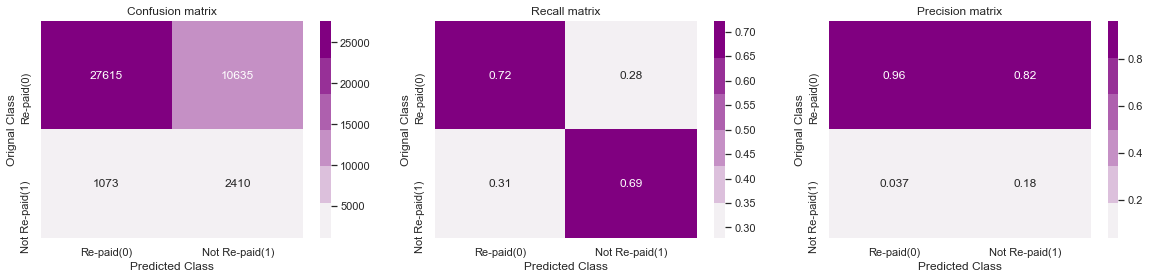

In [128]:
sns.set(font_scale = 1)
y_pred = np.ones((len(X_test),), dtype=int)
for i in range(len(y_pred_prob)):
    if y_pred_prob[i] <= 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
print('The test AUC score is :', roc_auc_score(y_test, y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format(
    (1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.72      0.83     38250
           1       0.18      0.69      0.29      3483

    accuracy                           0.72     41733
   macro avg       0.57      0.71      0.56     41733
weighted avg       0.90      0.72      0.78     41733



In [123]:
C = confusion_matrix(y_test,y_pred)

In [111]:
pred=pd.DataFrame({'y':y_test,'proba':y_pred_prob})

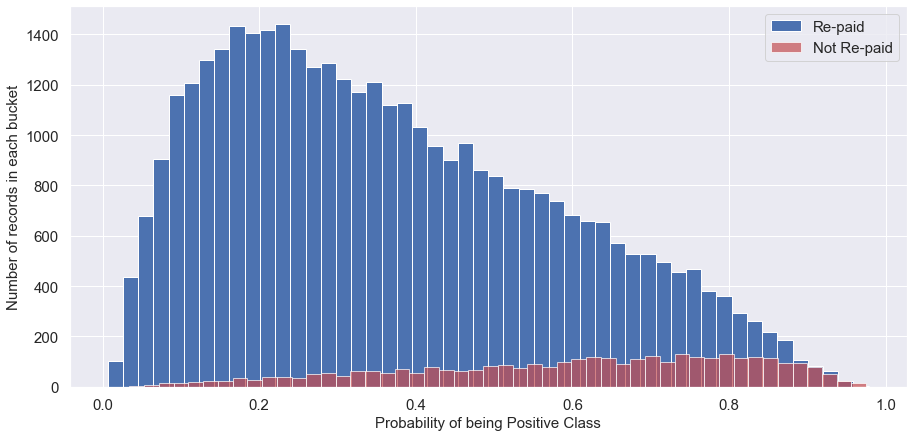

In [73]:
plt.figure(figsize=(15,7))
plt.hist(pred['proba'].loc[pred['y']==0], bins=50, label='Re-paid')
plt.hist(pred['proba'].loc[pred['y']==1], bins=50, label='Not Re-paid', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class', fontsize=15)
plt.ylabel('Number of records in each bucket', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=15, pad=5)
plt.show() 

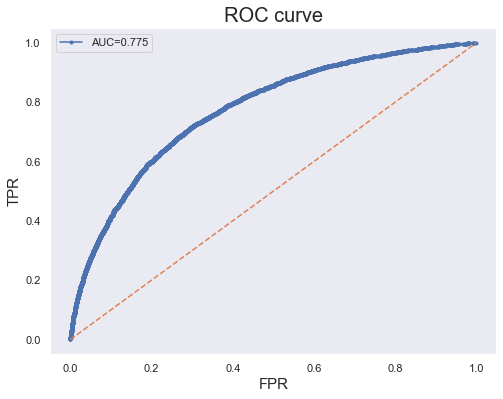

In [74]:
sns.set(font_scale = 1)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

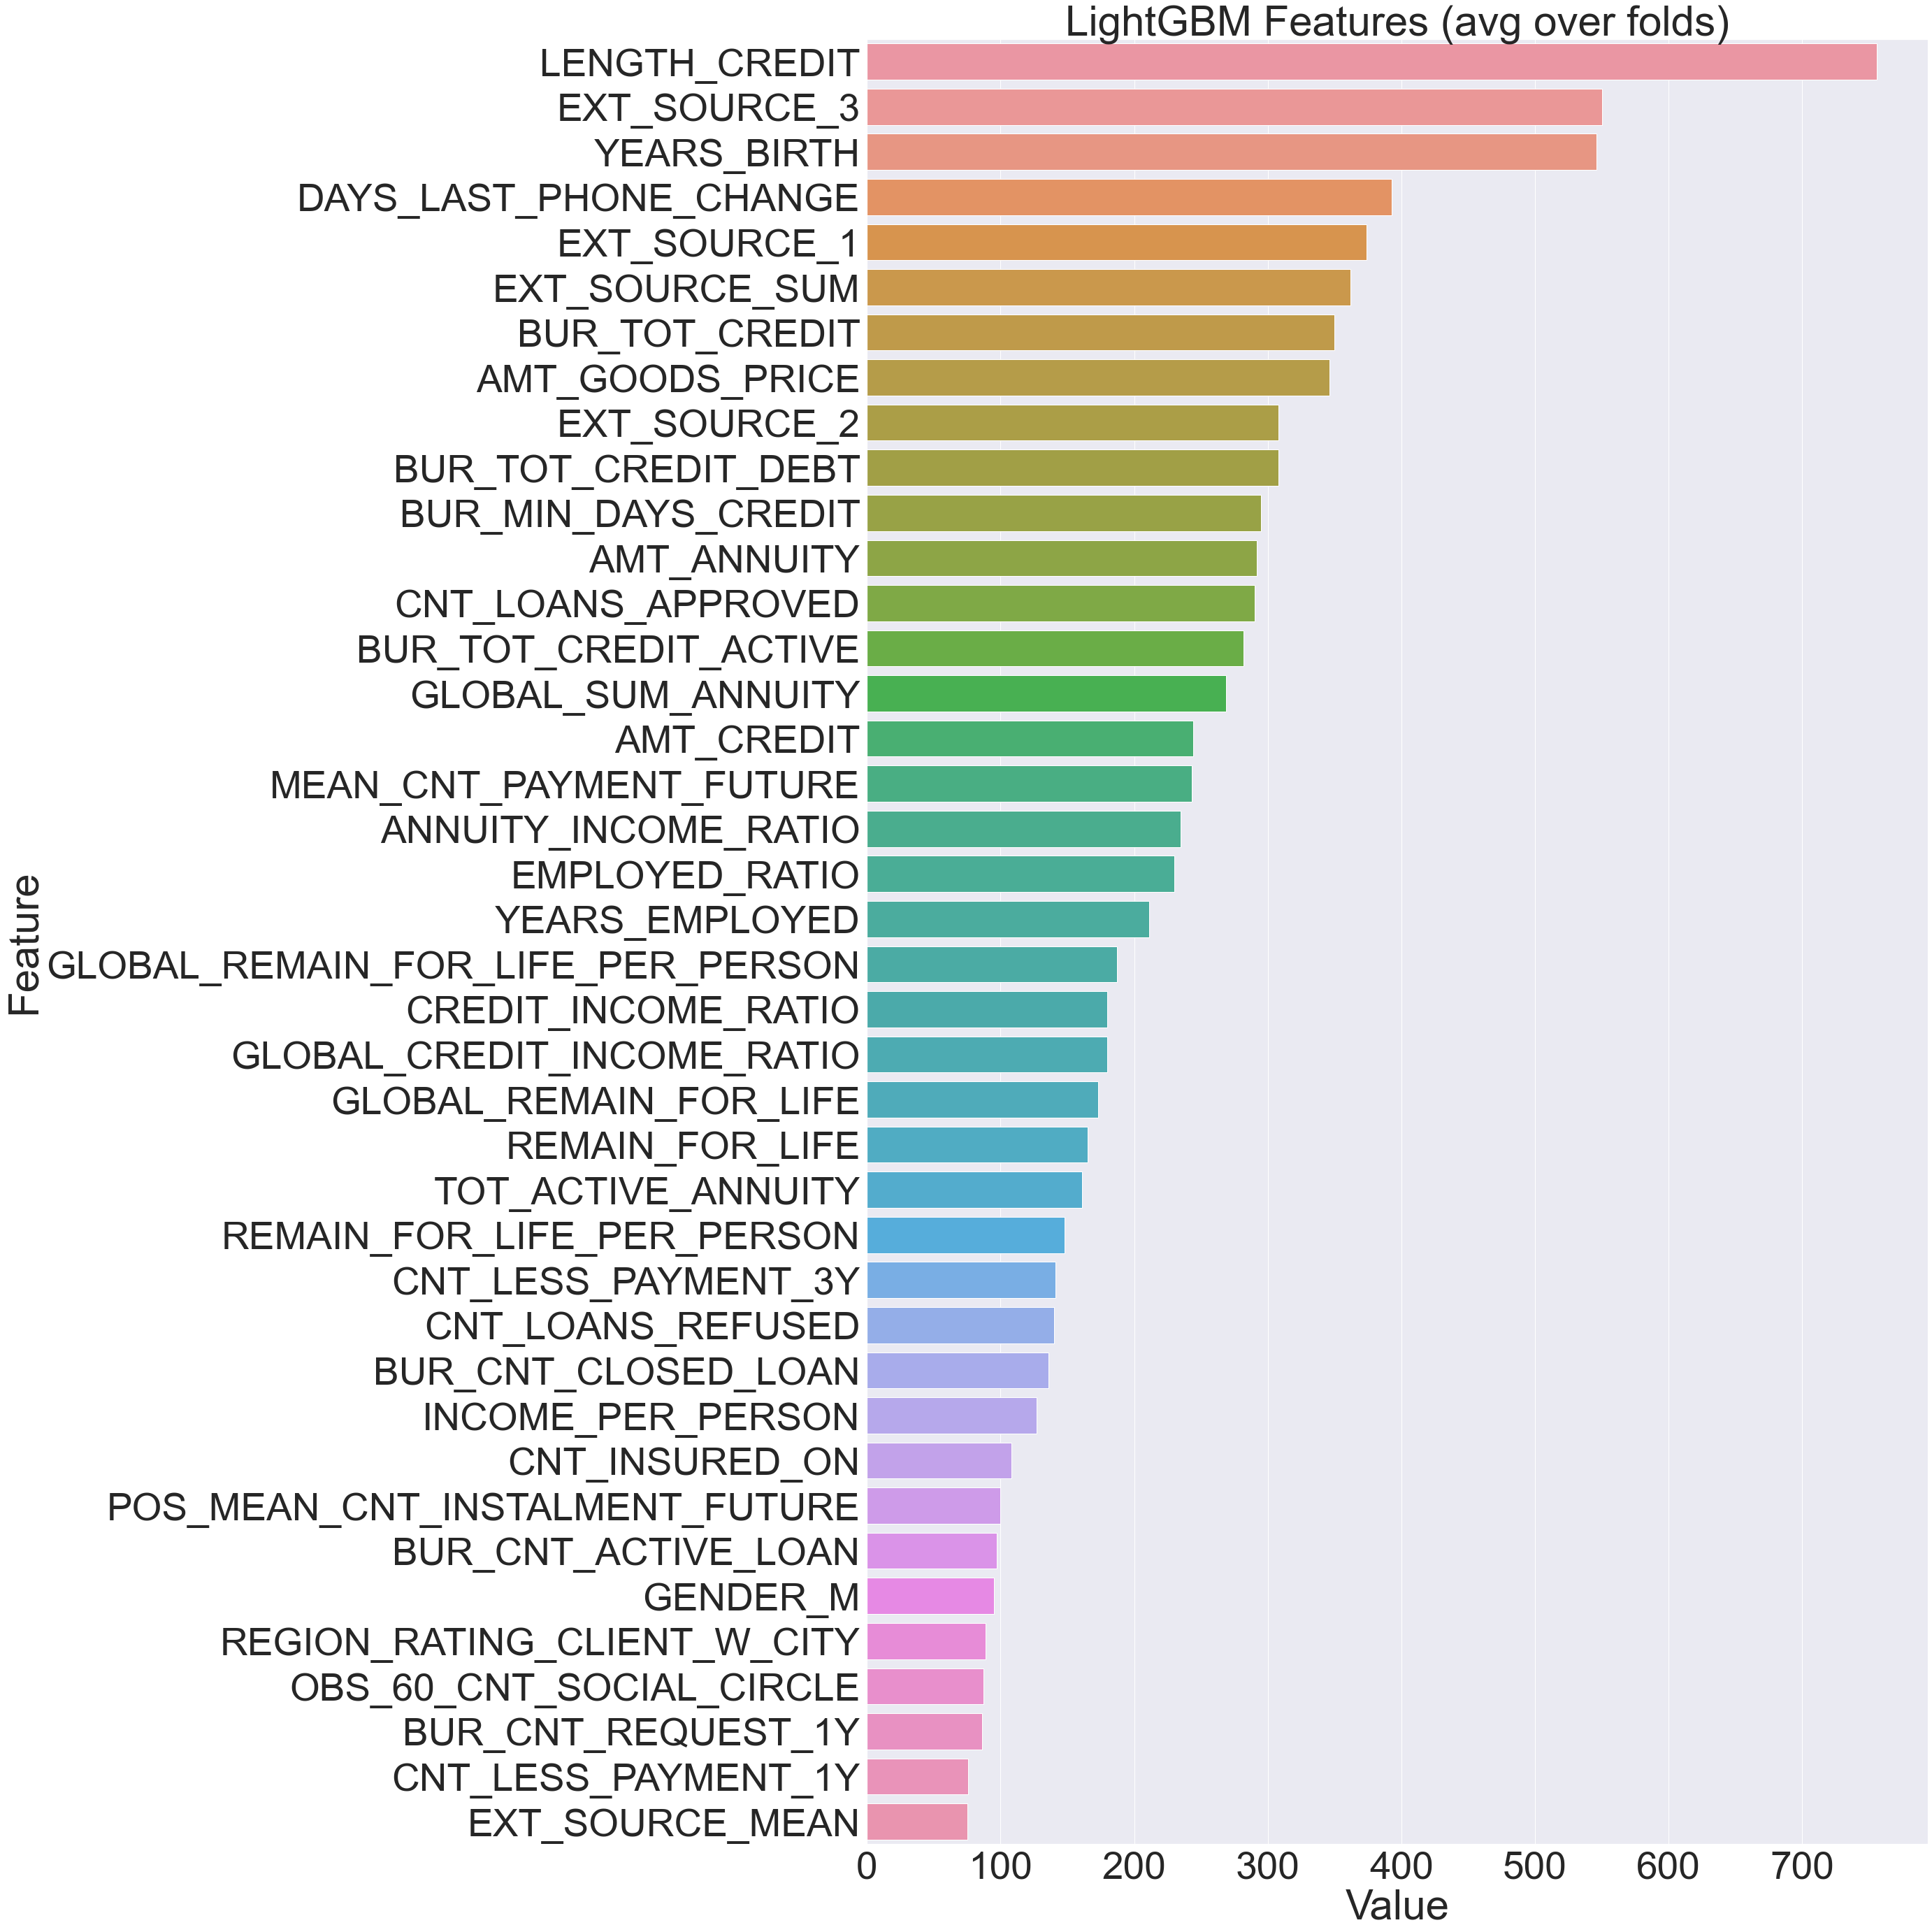

In [75]:
feature_imp= pd.DataFrame({'Value':lgbm.feature_importance(),'Feature':lgbm.feature_name()})
plt.figure(figsize=(40, 40))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:40])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
#plt.savefig('lgbm_importances-01.png')
plt.show()

In [61]:
feature_imp2 = pd.DataFrame(sorted(zip(lgbm.feature_importance(), lgbm.feature_name())), columns=['Value','Feature'])
features_df2 = feature_imp2.sort_values(by="Value", ascending=False)
selected_features2 = list(features_df2[features_df['Value']>=0]['Feature'])
print("nombre de variables : ", len(selected_features2))

nombre de variables :  53


In [93]:
sns.set(font_scale = 1)

In [76]:
# Saving the final model LightGBM as pickle file for the future use in productionizing the model
with open('model_lgbm_imp.pkl','wb') as fp:
    pickle.dump(lgbm, fp)

# Calcul de seuil avec le modele Lightgbm

## Calcul du meilleur seuil avec la courbe roc

Best Threshold=0.485645, G-Mean=0.709


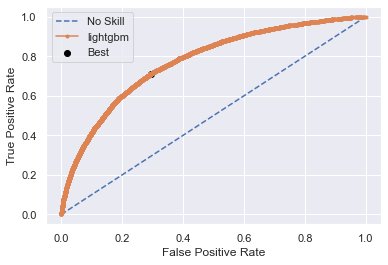

In [101]:
import math
import matplotlib.pyplot as plt
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='lightgbm')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr, tpr, marker='.', label='lightgbm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.486, G-Mean=0.709


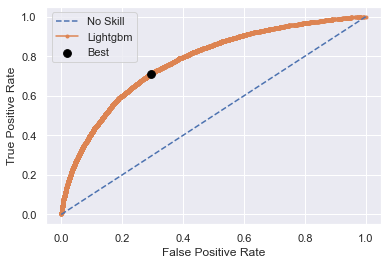

In [247]:
import math
import matplotlib.pyplot as plt

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%.3f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=60,zorder=2)
plt.plot(fpr, tpr, marker='.', label='Lightgbm',zorder=1)
#plt.plot(fpr, tpr, marker='.', label='lightgbm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Autre calcul

In [248]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%.3f' % (best_thresh))

Best Threshold=0.486


Appliccation du seuil à la matrice de confusion

The test AUC score is : 0.7750761101071685
The percentage of misclassified points 29.35% :


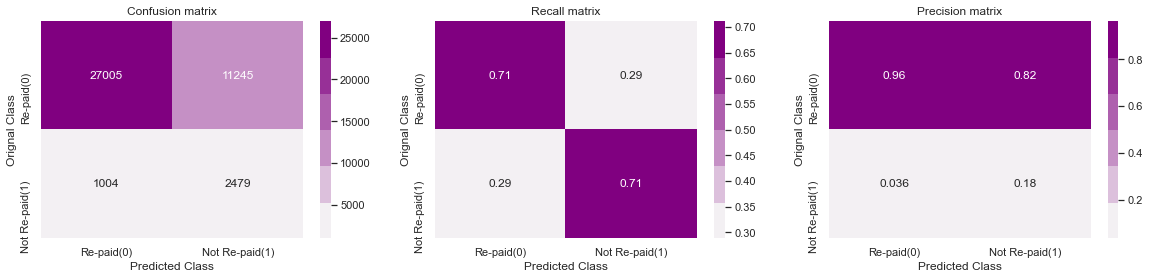

In [200]:
sns.set(font_scale = 1)
y_pred = np.ones((len(X_test),), dtype=int)
for i in range(len(y_pred_prob)):
    if y_pred_prob[i] <= 0.485645:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
print('The test AUC score is :', roc_auc_score(y_test, y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format(
    (1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

Il y a plus de vrai positifs et moins de faux negatifs mais plus de faux positifs

Calcul de perte et meilleur seuil

In [188]:
X_test

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
125450       -0.5699           -0.5256      0.4457           0.3063   
33661        -0.5699           -0.5256      1.2476           1.1493   
178961       -0.5699           -0.6098      0.6710           0.9084   
220231       -0.5699           -0.3992     -0.2046          -0.2959   
217269       -0.5699           -0.6730     -0.0060          -0.0550   
...              ...               ...         ...              ...   
135509        0.8199            5.5818      0.9787           0.9084   
199736       -0.5699           -0.3992      1.1106           0.9084   
217220       -0.5699            0.1062     -0.6899          -0.6572   
278049        0.8199           -0.3150     -0.7692          -0.8017   
270977       -0.5699           -0.9468     -0.0838           0.0895   

        AMT_ANNUITY  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
125450      -0.1431          -1.2685               -0.1105   
33661        0.3461          -0.1648                1.8617   
178961       0.7072          -0.1648               -0.1105   
220231      -0.1911          -1.2685               -0.1105   
217269      -0.2209          -1.2685               -0.1105   
...             ...              ...                   ...   
135509       1.6995          -0.1648               -2.0828   
199736       0.2406          -0.1648                1.8617   
217220      -0.3416          -0.1648               -0.1105   
278049      -0.9086          -0.1648               -0.1105   
270977      -0.7679          -0.1648               -0.1105   

        REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
125450                      -0.0705        0.0140        1.1449       -0.9187   
33661                        1.9253       -1.1817       -0.1218        0.1188   
178961                      -0.0705        0.0140        0.6370        0.1188   
220231                      -0.0705        1.3173        0.3896        0.1188   
217269                      -0.0705        0.0140       -1.3117        0.9009   
...                             ...           ...           ...           ...   
135509                      -2.0663        1.3804        1.3853       -1.4766   
199736                       1.9253        0.1723       -2.3253        0.1188   
217220                      -0.0705        0.0140        0.2613       -1.7564   
278049                      -0.0705        0.0140        0.3546        0.1188   
270977                      -0.0705        2.6785        0.9460        0.1188   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
125450                   -0.6154                   -0.3251   
33661                    -0.1871                   -0.3251   
178961                    1.9545                    1.9225   
220231                    1.9545                   -0.3251   
217269                   -0.6154                   -0.3251   
...                          ...                       ...   
135509                   -0.6154                   -0.3251   
199736                   -0.6154                   -0.3251   
217220                   -0.6154                   -0.3251   
278049                    1.9545                   -0.3251   
270977                   -0.6154                   -0.3251   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
125450                   -0.6134                   -0.2787   
33661                    -0.1814                   -0.2787   
178961                    1.9787                    2.4856   
220231                    1.9787                   -0.2787   
217269                   -0.6134                   -0.2787   
...                          ...                       ...   
135509                   -0.6134                   -0.2787   
199736                   -0.6134                   -0.2787   
217220                   -0.6134                   -0.2787   
278049                    1.9787                   -0.2787   
270977    

In [209]:
print('perte reelle attendue:',pcm[1,0])
print('perte opportunité attendue:',pcm[0,1])

perte reelle attendue: 0.025711067979776195
perte opportunité attendue: 0.2548343037883689


In [258]:
threshold = []
opp_loss = []
real_loss = []
total_loss = []

loan_val = 1000000
loss_given_def = 0.7
gain_no_def = 0.2

for x in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    opp = 0
    real = 0
    total = 0

    prediction = y_pred_prob > x

    cm = confusion_matrix(y_test, prediction)

    pcm = cm/np.sum(cm)

    opp = round(pcm[0,1] * loan_val * gain_no_def,2)
    real = round(pcm[1,0] * loan_val * loss_given_def,2)
    total = opp + real
    threshold.append(x)
    opp_loss.append(opp)
    real_loss.append(real)
    total_loss.append(total)

   
credit_df = pd.DataFrame({'Threshold': threshold, 'opp_loss' : opp_loss, 'real_loss': real_loss, "total_loss": total_loss})
del threshold
del opp_loss
del real_loss
del total_loss

In [216]:
credit_df

Threshold     opp_loss   real_loss   total_loss
0      0.0000 183,308.1700      0.0000 183,308.1700
1      0.1000 168,657.9000    519.9700 169,177.8700
2      0.2000 135,815.7800  2,767.5900 138,583.3700
3      0.3000 102,494.4300  6,524.8100 109,019.2400
4      0.4000  73,888.7700 11,808.4000  85,697.1700
5      0.5000  50,966.8600 17,997.7500  68,964.6100
6      0.6000  31,816.5500 25,562.5000  57,379.0500
7      0.7000  17,032.0800 35,257.4700  52,289.5500
8      0.8000   6,162.9900 45,740.7800  51,903.7700
9      0.9000     829.0800 55,569.9300  56,399.0100
10     1.0000       0.0000 58,421.3900  58,421.3900

0.8 minimiserait la perte, regardons graphiquement

Text(0.5, 0, 'Seuil pour la probabilité de defaut')

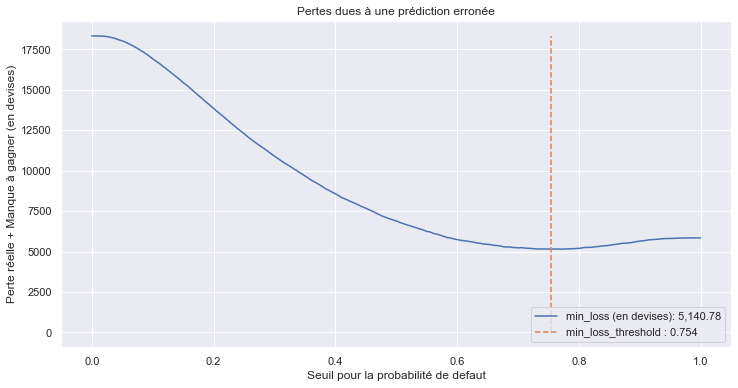

In [263]:
threshold = []
opp_loss = []
real_loss = []
total_loss = []

loan_val = 100000
loss_given_def = 0.7
gain_no_def = 0.2

for x in np.linspace(0, 1, 1000):
    opp = 0
    real = 0
    total = 0

    prediction = y_pred_prob > x

    cm = confusion_matrix(y_test, prediction)

    pcm = cm/np.sum(cm)

    opp = round(pcm[0,1] * loan_val * gain_no_def,2)
    real = round(pcm[1,0] * loan_val * loss_given_def,2)
    total = opp + real
    threshold.append(x)
    opp_loss.append(opp)
    real_loss.append(real)
    total_loss.append(total)

min_loss = round(min(total_loss),3)
imin = total_loss.index(min(total_loss))
min_loss_threshold = round(threshold[imin],3)

fig = plt.figure(figsize = (12,6))

plt.plot(threshold, total_loss, label = 'min_loss (en devises): {:,}'.format(min_loss))    

plt.plot([min_loss_threshold,min_loss_threshold],[0,max(total_loss)],
        label = 'min_loss_threshold : {:0.3}'.format(min_loss_threshold), linestyle = 'dashed')
plt.legend(loc = 'lower right')
plt.title('Pertes dues à une prédiction erronée')
plt.ylabel('Perte réelle + Manque à gagner (en devises)')
plt.xlabel('Seuil pour la probabilité de defaut')

# Interpretation du modèle LightGBM

In [277]:
len(selected_features)

69

In [295]:
shap_values = shap.TreeExplainer(lgbm).shap_values(X_val[selected_features])

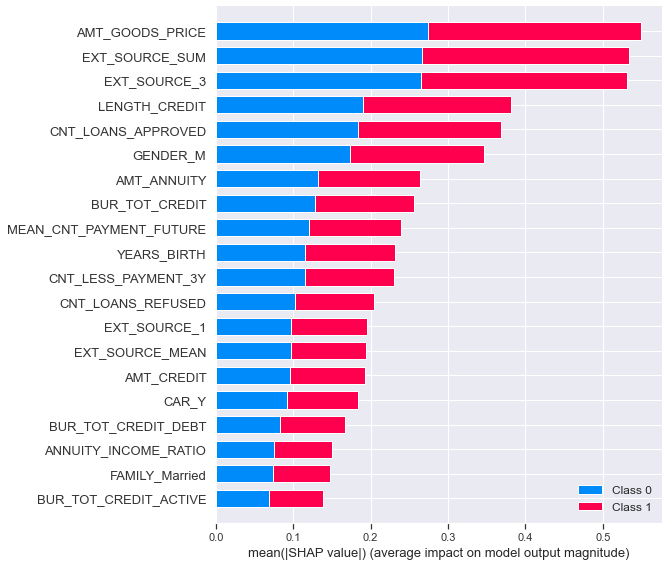

In [296]:
shap.summary_plot(shap_values, X_val[selected_features])

In [307]:
X_val_array = X_val[selected_features].to_numpy()

In [310]:
explainer = shap.TreeExplainer(lgbm)

In [312]:
shap.initjs()

IndexError: index 1 is out of bounds for axis 0 with size 1

In [308]:
shap_values = shap.TreeExplainer(lgbm).shap_values(X_val_array)

In [309]:
c = clf.predict(X_val[selected_features])

In [333]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], selected_features)

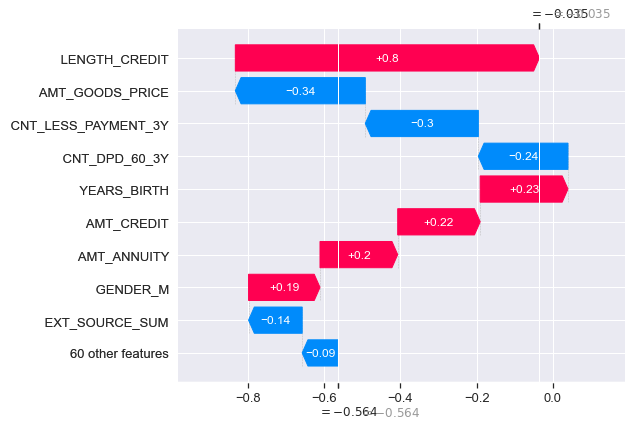

In [326]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], features = X_val_array[0], feature_names = selected_features, max_display = 10, show = True)

In [338]:
X_val

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
112008       -0.5699           -0.8625     -1.2160          -1.1389   
104941        2.2097           -0.7362      1.1106           0.9084   
238371       -0.5699            1.3698     -0.2202          -0.2116   
275951       -0.5699           -0.3150      0.1160           0.3063   
158677        2.2097           -0.3150     -0.8830          -0.7776   
...              ...               ...         ...              ...   
90205         0.8199           -0.3150      0.3047           0.5110   
175441       -0.5699           -0.3150     -0.8032          -0.8017   
177821        0.8199           -0.6098     -1.2348          -1.1992   
89593        -0.5699            0.3168     -0.5500          -0.4163   
168268       -0.5699           -0.5256     -0.4596          -0.6693   

        AMT_ANNUITY  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
112008      -1.0172          -1.2685               -0.1105   
104941       0.2406           2.0426               -2.0828   
238371      -0.3826          -0.1648               -0.1105   
275951      -0.2822          -0.1648               -0.1105   
158677      -0.9203           2.0426                1.8617   
...             ...              ...                   ...   
90205       -0.4426           0.9389               -0.1105   
175441      -0.8270          -0.1648               -0.1105   
177821      -1.4826           0.9389               -0.1105   
89593        0.0958          -1.2685               -0.1105   
168268      -0.4684          -1.2685               -0.1105   

        REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
112008                      -0.0705        0.0140       -0.2107        0.1188   
104941                      -2.0663        1.1239        1.2639       -0.5973   
238371                      -0.0705        2.6913        0.7591        0.6387   
275951                      -0.0705        1.4361        1.3546        0.4527   
158677                       1.9253        0.0140        0.1043        0.1393   
...                             ...           ...           ...           ...   
90205                       -0.0705        2.3355        0.3142        0.1188   
175441                      -0.0705       -0.1300       -1.7543       -1.5994   
177821                      -0.0705        0.0140        0.4509        1.2917   
89593                       -0.0705        0.0140        0.3140        0.1188   
168268                      -0.0705        0.2263        0.6634       -0.3749   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
112008                   -0.1871                   -0.3251   
104941                   -0.6154                   -0.3251   
238371                    0.6696                   -0.3251   
275951                   -0.1871                   -0.3251   
158677                    0.2412                   -0.3251   
...                          ...                       ...   
90205                    -0.6154                   -0.3251   
175441                    0.2412                   -0.3251   
177821                   -0.6154                   -0.3251   
89593                    -0.6154                   -0.3251   
168268                   -0.1871                   -0.3251   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
112008                   -0.1814                   -0.2787   
104941                   -0.6134                   -0.2787   
238371                    0.6826                   -0.2787   
275951                   -0.1814                   -0.2787   
158677                    0.2506                   -0.2787   
...                          ...                       ...   
90205                    -0.6134                   -0.2787   
175441                    0.2506                   -0.2787   
177821                   -0.6134                   -0.2787   
89593                    -0.6134                   -0.2787   
168268    

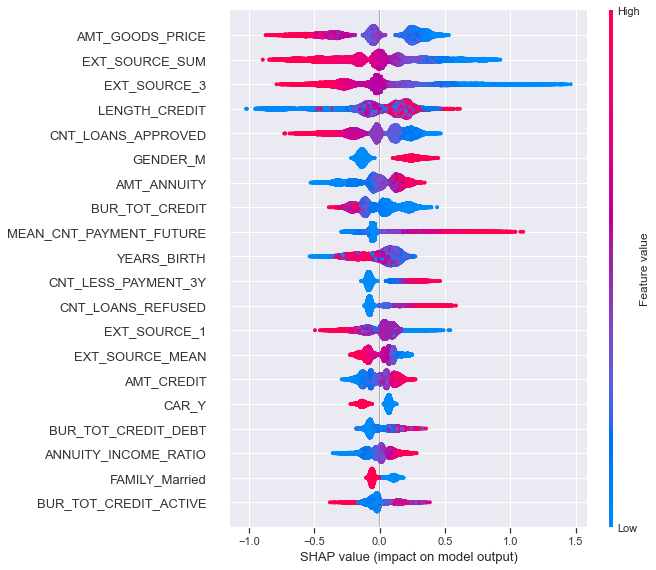

In [380]:
test=shap.summary_plot(shap_values[1], X_val[selected_features])


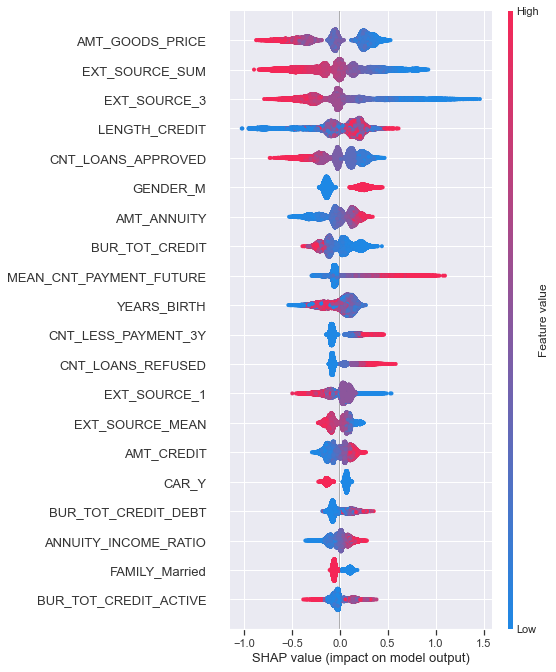

In [376]:
mpl_fig = shap_summary_plot(shap_values[1], X_val[selected_features], feature_names=selected_features, max_display=20)

# LightGBM avec un estimation bayesienne des hyper-parametre

In [96]:
clf = lgb.LGBMClassifier(n_estimators=10000,nthread = -1,random_state=42)

In [112]:
y_train.shape[0]

194753

In [36]:
def lgbm_evaluate(**params):
    
    '''
    method for optimization of auc score
    '''
    
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    # params['n_estimators'] = int(params['n_estimators'])
            
    clf = lgb.LGBMClassifier(**params,n_estimators=10000,nthread = -1,random_state=42)
    
    test_pred_proba = np.zeros(y_train.shape[0])  

    

    clf.fit(X_train, y_train, 
             eval_set = [(X_val, y_val)], eval_metric = 'auc', 
                verbose = False, early_stopping_rounds = 100)
      
    test_pred_proba = clf.predict_proba(X_train, num_iteration = clf.best_iteration_)[:, 1]

    return roc_auc_score(y_train, test_pred_proba)

In [ ]:
{'boosting_type': 'gbdt',
 'max_depth': 5,
 'objective': 'binary',
 'nthread': 5,
 'num_leaves': 32,
 'learning_rate': 0.05,
 'max_bin': 512,
 'subsample_for_bin': 200,
 'subsample': 0.7,
 'subsample_freq': 1,
 'colsample_bytree': 0.8,
 'reg_alpha': 20,
 'reg_lambda': 20,
 'min_split_gain': 0.5,
 'min_child_weight': 1,
 'min_child_samples': 10,
 'scale_pos_weight': 1,
 'num_class': 1,
 'metric': 'auc',
 'num_iterations': 2500,
 'early_stopping_round': 100}

In [117]:
params = {'colsample_bytree': (0.8, 1), #the fraction of columns to be randomly samples
          'learning_rate': (.01, .02, .05), 
          'num_leaves': (30, 40),  #max leaf nodes
          # 'n_estimators' :(100,10000),  #number of trees
          'subsample': (0.7,0.8, 1),  #fraction of observations to be randomly samples for each tree.
          'max_depth': (5, 10),  #maximum depth of a tree
          'reg_alpha': (.03, .05),  #L1 regularization
          'reg_lambda': (.06, .08), #L2 regularization
         }

bo = BayesianOptimization(lgbm_evaluate, params)


In [118]:
bo.maximize(init_points = 5, n_iter = 5) 
#init_points exploration points
#n_iter exploitation(how deep to exploit those points)

|   iter    |  target   | colsam... | learni... | max_depth | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
|  1        |  0.8403   |  0.8693   |  0.01097  |  7.987    |  34.62    |  0.04204  |  0.06385  |  0.801    |
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
|  2        |  0.8601   |  0.9304   |  0.01892  |  5.689    |  39.99    |  0.03951  |  0.07101  |  0.9106   |
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
|  3        |  0.8481   |  0.9084   |  0.01285  |  5.78     |  34.67    |  0.04599  |  0.07714  |  0.9435   |
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threa

In [119]:
best_params=bo.max['params']
best_params['num_leaves'] = int(best_params['num_leaves'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.02,
 'max_depth': 8,
 'num_leaves': 36,
 'reg_alpha': 0.05,
 'reg_lambda': 0.08,
 'subsample': 0.8}

In [65]:
params = {'colsample_bytree': 0.8,
 'learning_rate': 0.02,
 'max_depth': 8,
 'num_leaves': 36,
 'reg_alpha': 0.05,
 'reg_lambda': 0.08,
 'subsample': 0.8,
  'n_estimators' : 10000,
   'nthread' : -1,
 'random_state':42,
         'is_unbalance' : True}

In [66]:

lgbm = lgb.LGBMClassifier()

lgbm.set_params(**params) 
lgbm.fit(X_train[selected_features],y_train)



[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


LGBMClassifier(colsample_bytree=0.8, is_unbalance=True, learning_rate=0.02,
               max_depth=8, n_estimators=10000, nthread=-1, num_leaves=36,
               random_state=42, reg_alpha=0.05, reg_lambda=0.08, subsample=0.8)

In [70]:
y_pred_prob = lgbm.predict(X_train[selected_features])
print('The Train AUC score is {0}'.format(roc_auc_score(y_train, y_pred_prob)))
y_pred_prob = lgbm.predict(X_val[selected_features])
print('The Valid AUC score is {0}'.format(roc_auc_score(y_val, y_pred_prob)))   
y_pred_prob = lgbm.predict(X_test[selected_features])
print('The Test AUC score is {0}'.format(roc_auc_score(y_test, y_pred_prob)))

The Train AUC score is 0.9514459962462928
The Valid AUC score is 0.6508952052828021
The Test AUC score is 0.6468744996706693


In [63]:
y_pred_prob = lgbm.predict(X_val[selected_features])
print('The Valid AUC score is {0}'.format(roc_auc_score(y_val, y_pred_prob)))

The Valid AUC score is 0.5262146222830217


Sans matrice ponderation overfitting